In [1]:
import numpy as np
import pandas as pd
import math
from numpy import asarray
from numpy import save
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
lz=1
ly=5
lx=5
sounddropx=1200
sounddropy=770
sounddropz=0
lengthx=17/2224*lx
lengthy=17/1668*ly
lengthz=20/30*lz
queue=pd.read_csv('queue_wo_sorted.csv')

In [7]:
#targetF=['27.5', '55', '110', '220' ,'440', '880','1250','1760','2500','3520','5000','7040','10000','14080']
targetF=['55', '110', '220' ,'440', '880','1250','1760','2500','3520','5000','7040','10000','14080']
Meterial_spectrum=pd.read_csv('Meterial_spectrum.csv')

55


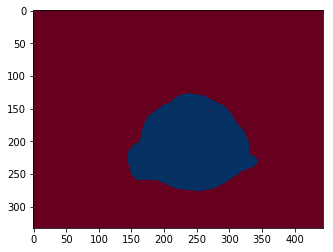

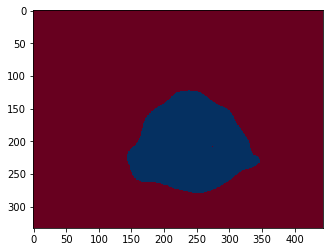

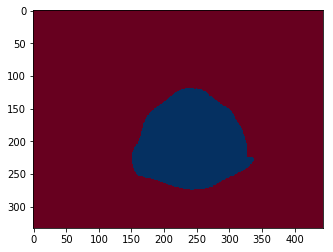

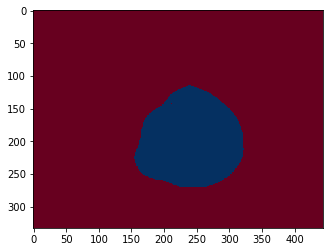

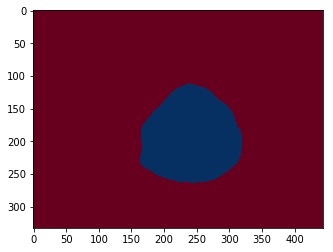

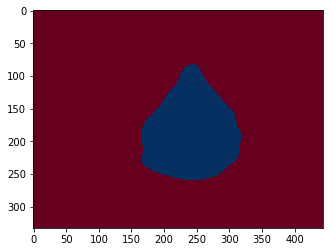

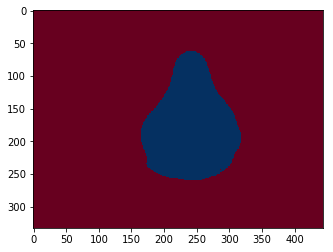

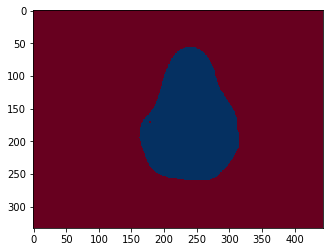

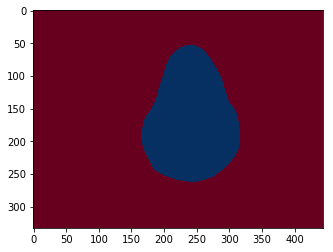

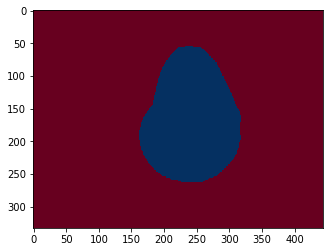

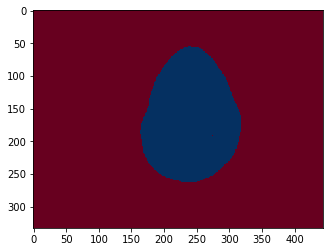

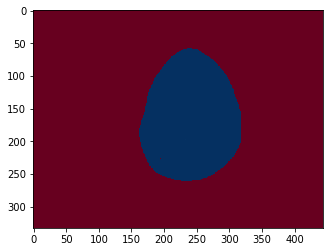

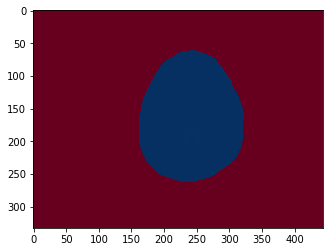

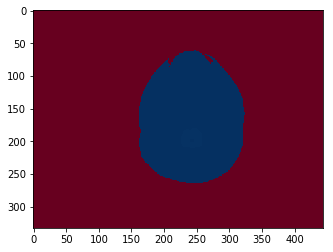

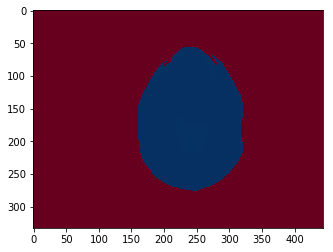

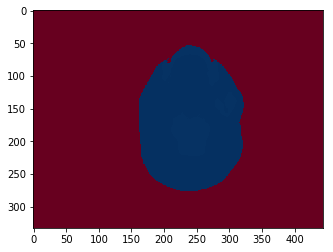

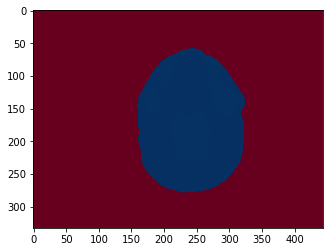

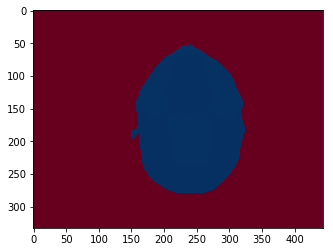

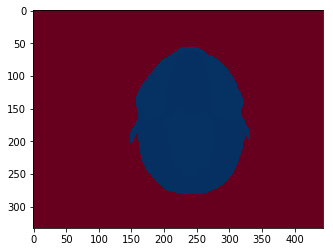

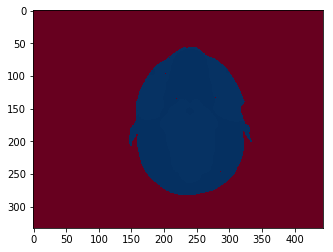

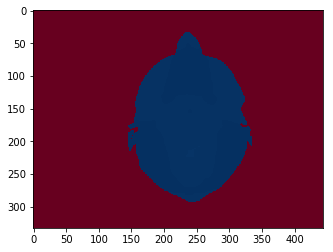

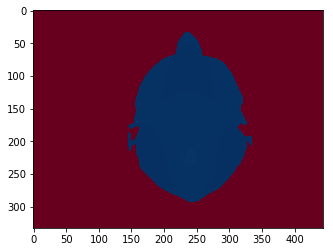

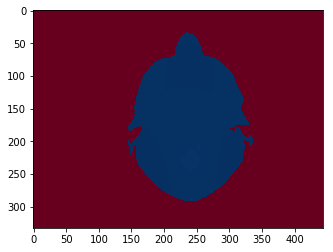

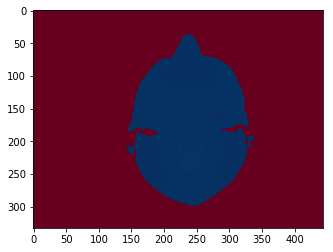

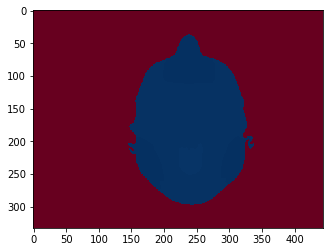

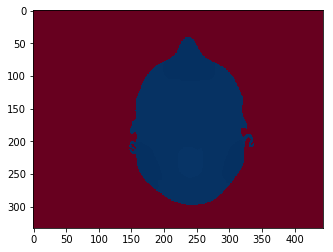

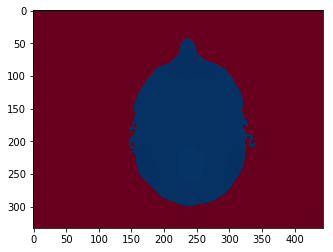

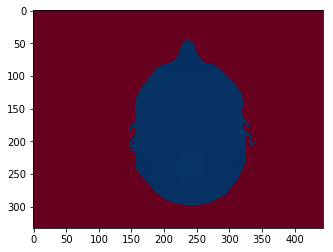

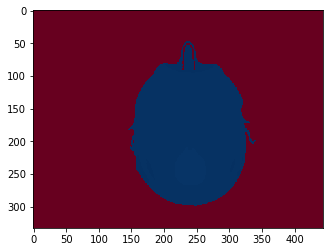

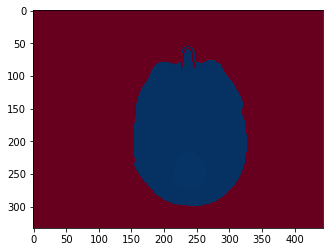

110


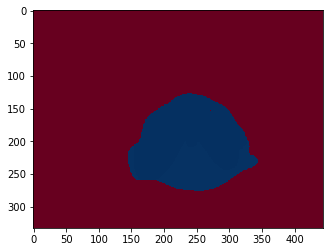

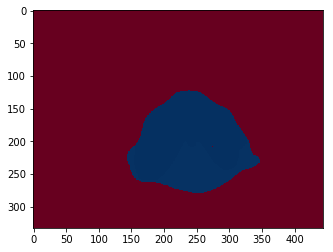

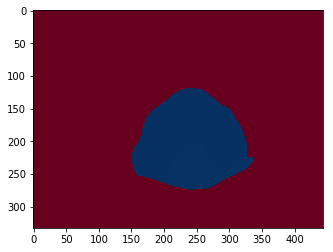

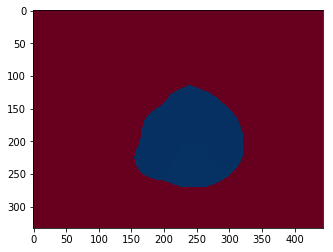

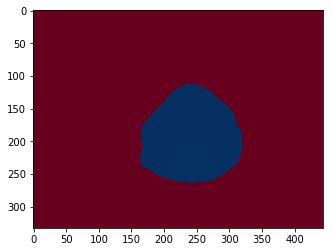

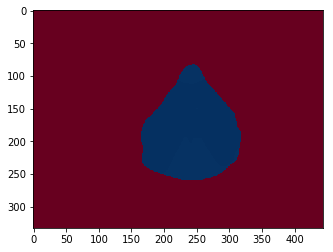

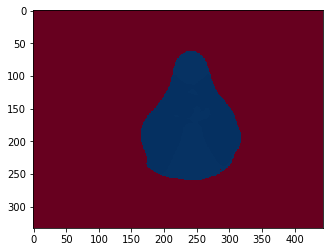

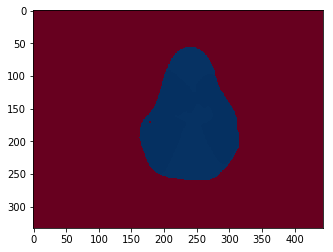

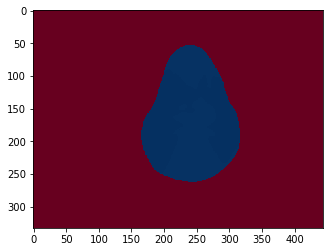

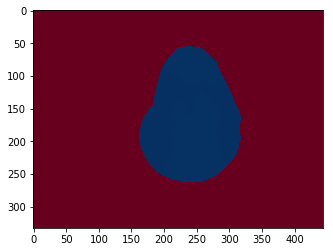

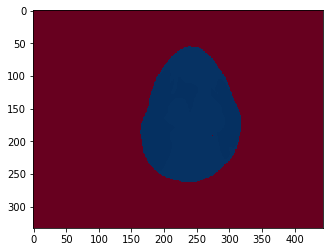

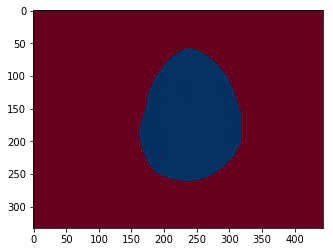

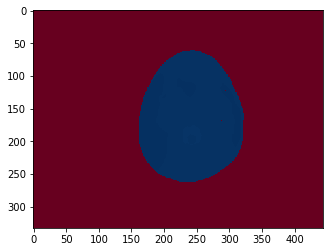

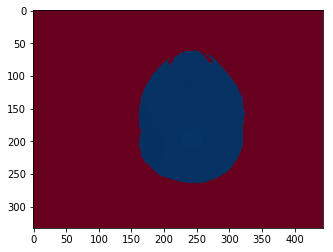

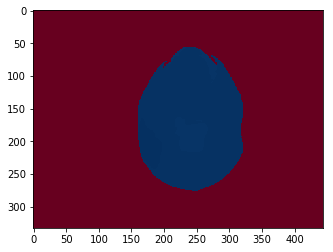

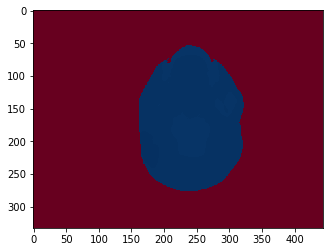

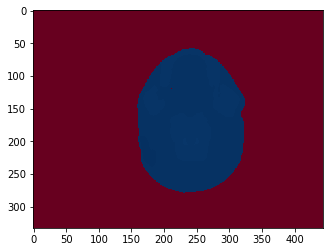

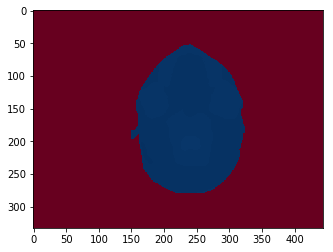

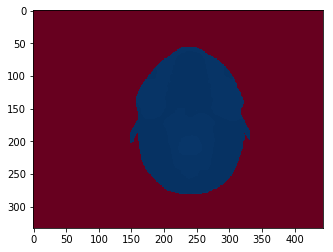

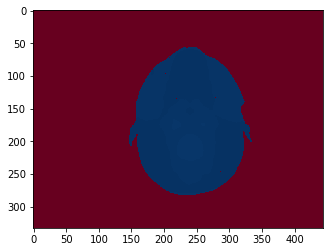

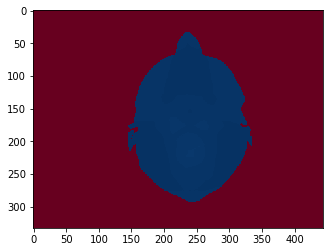

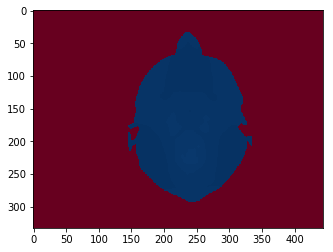

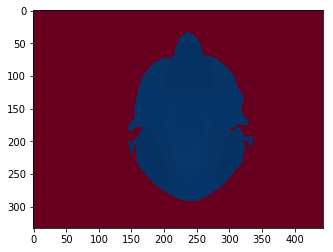

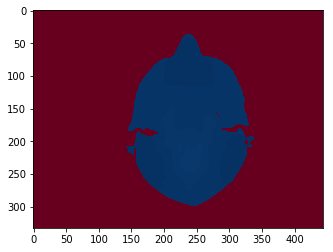

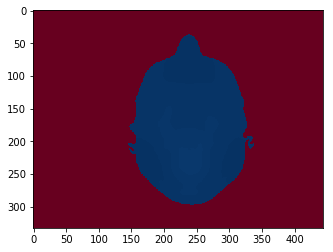

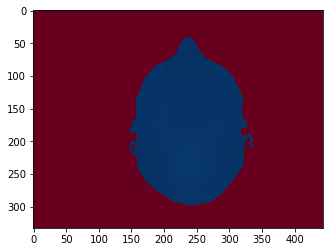

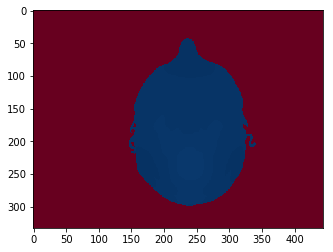

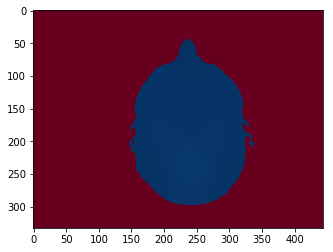

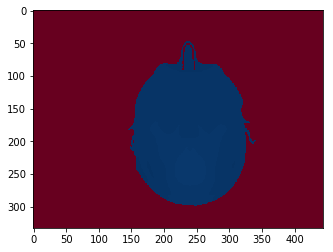

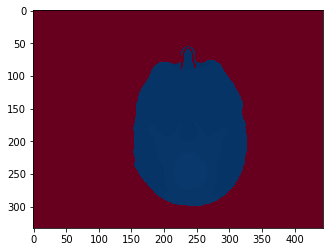

220


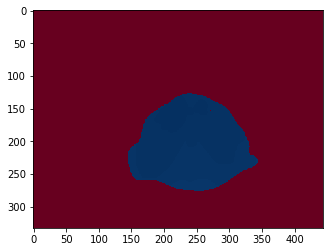

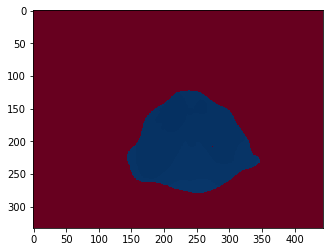

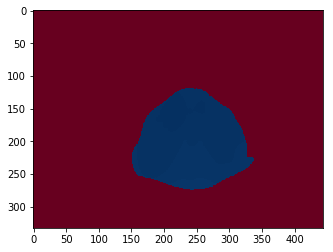

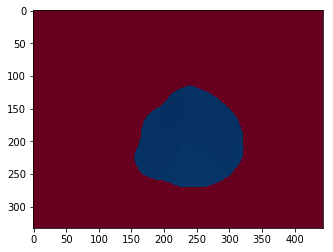

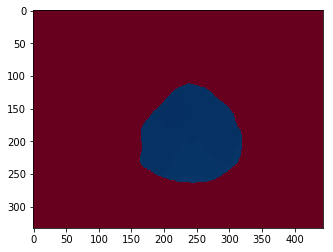

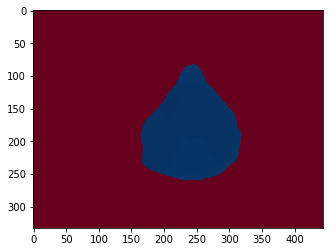

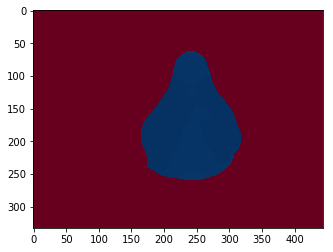

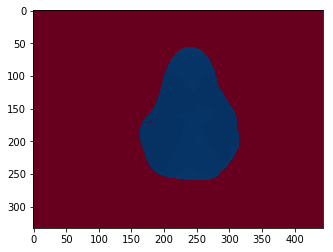

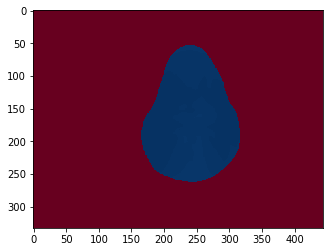

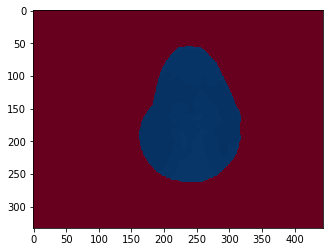

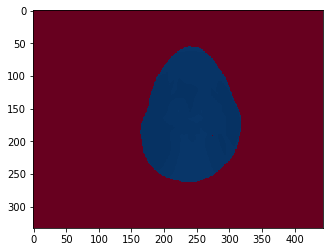

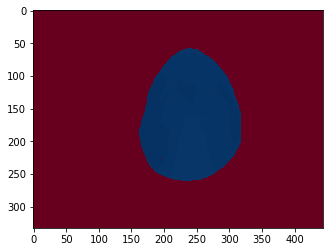

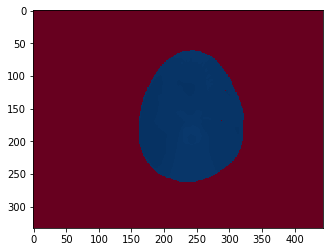

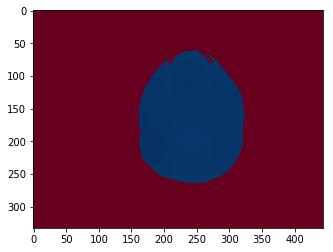

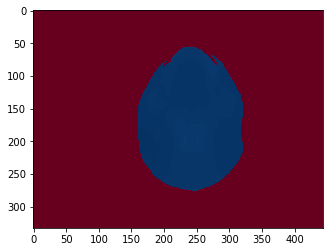

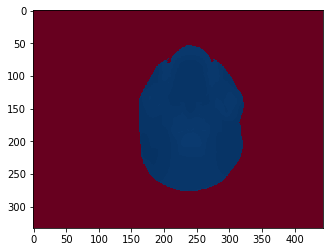

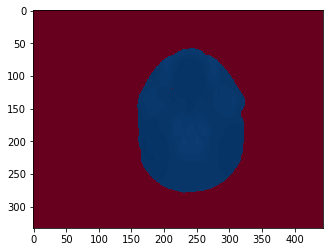

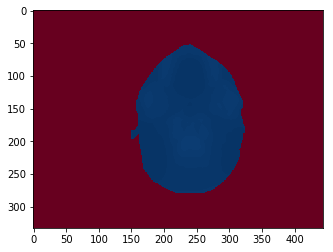

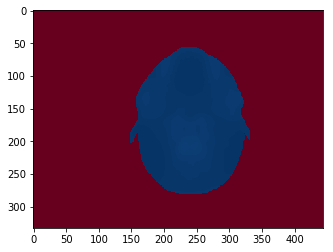

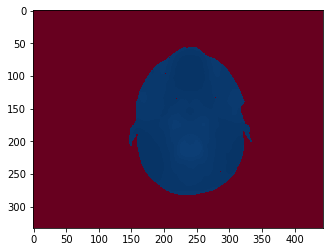

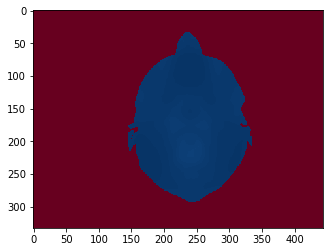

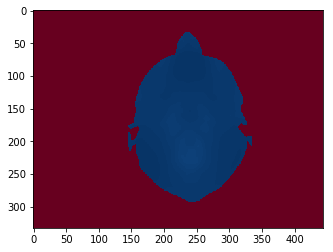

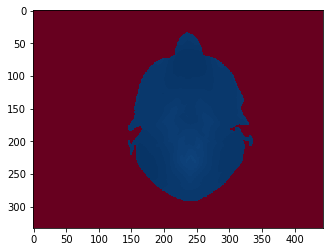

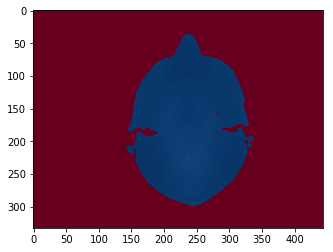

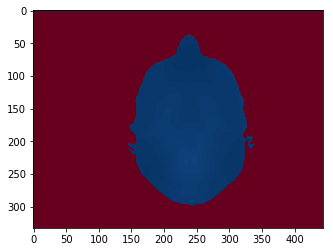

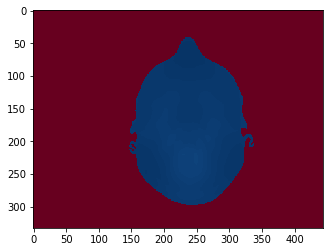

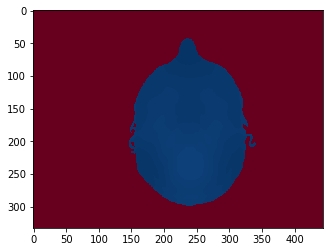

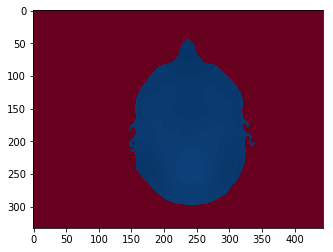

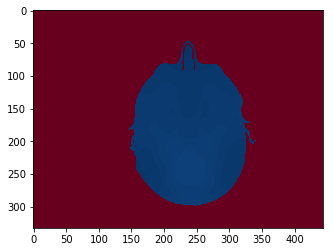

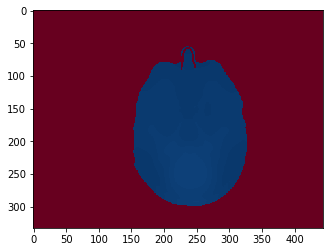

440


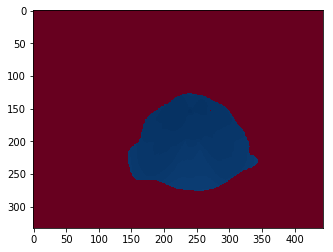

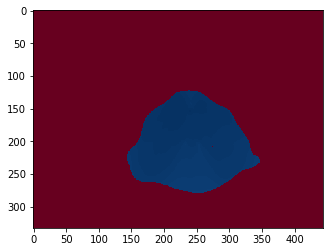

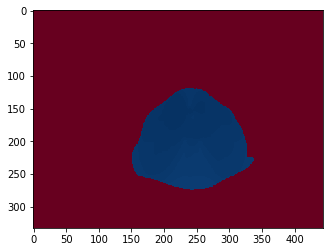

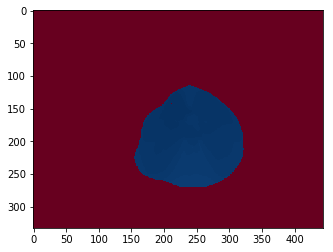

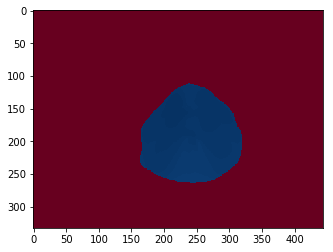

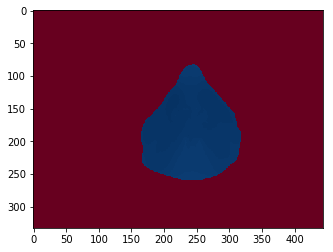

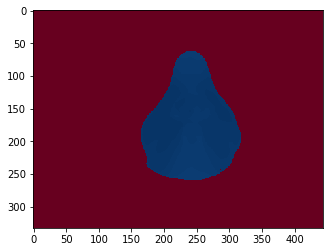

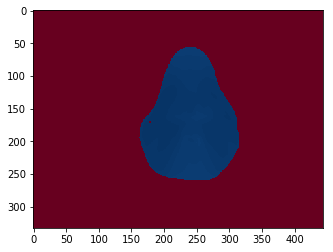

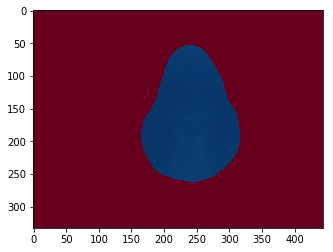

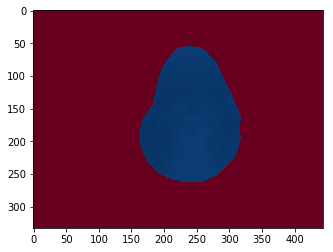

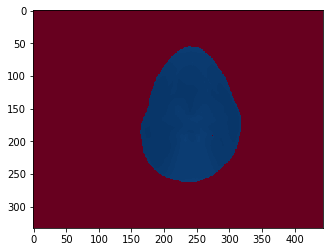

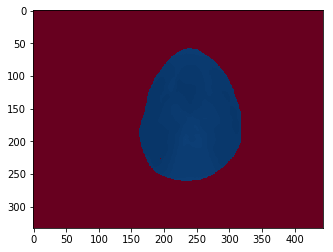

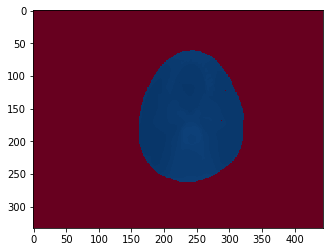

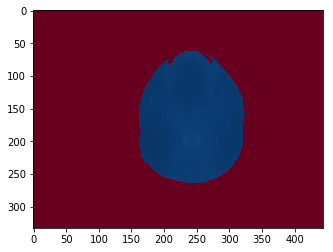

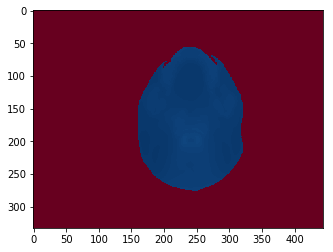

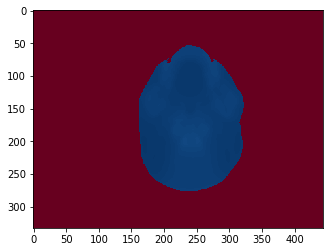

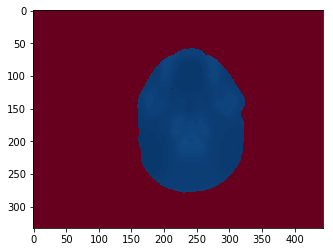

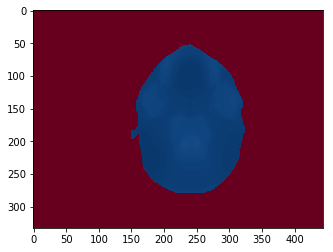

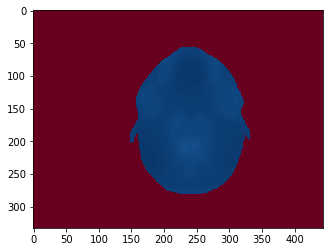

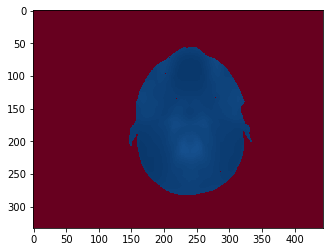

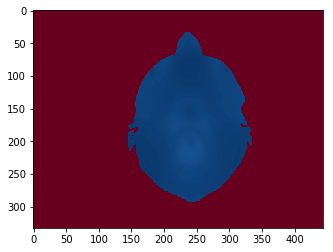

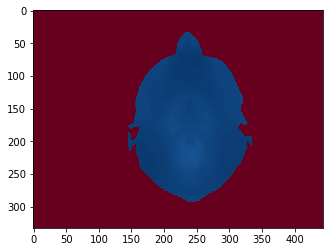

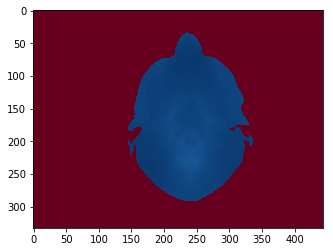

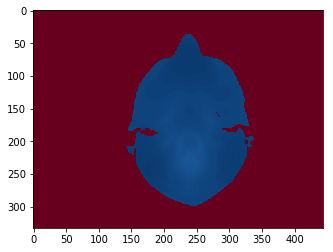

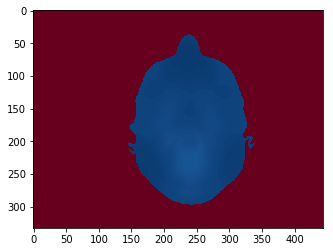

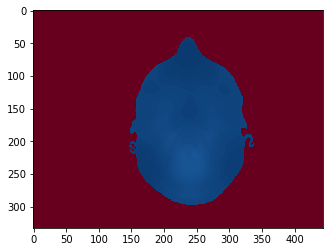

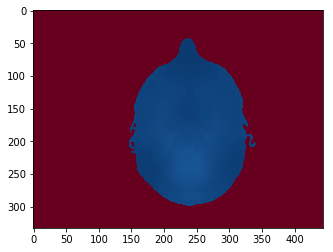

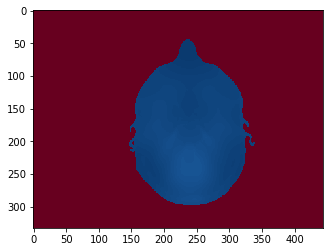

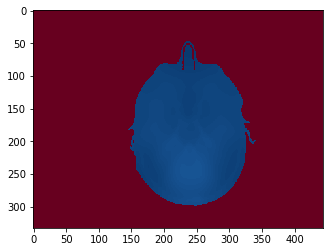

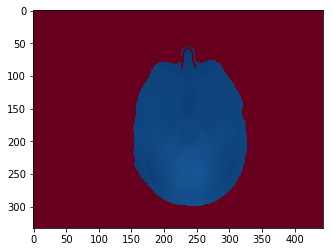

880


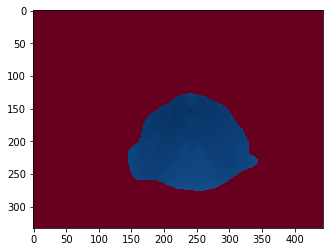

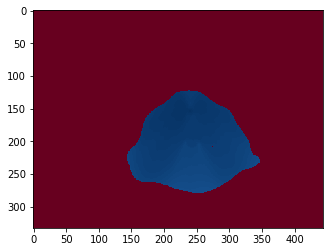

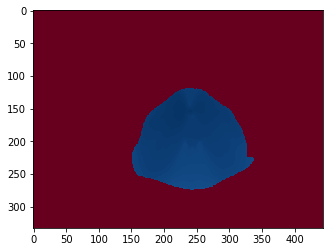

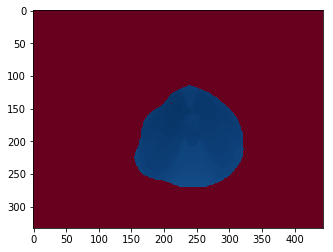

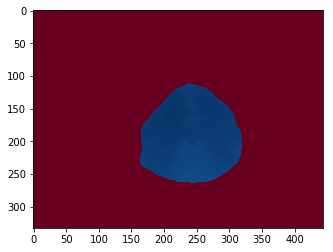

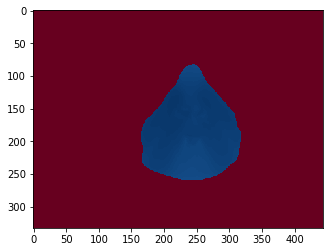

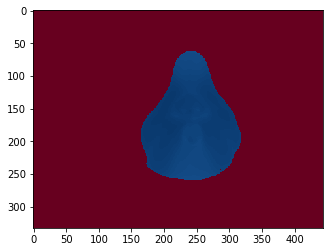

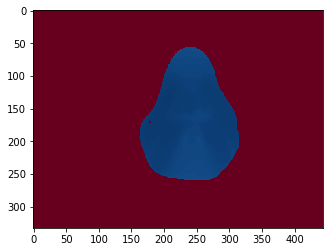

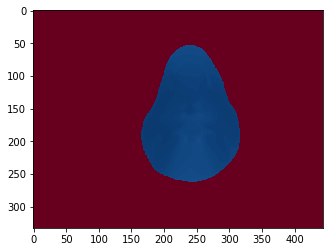

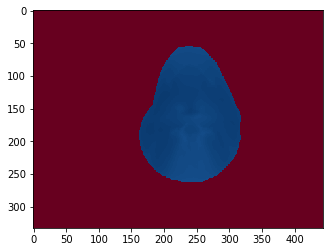

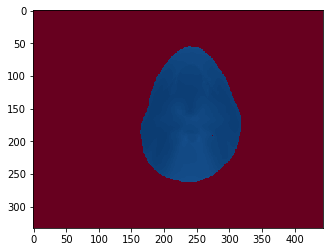

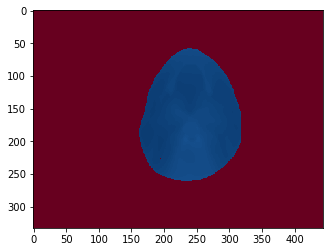

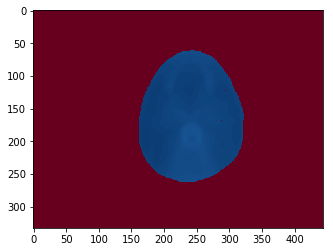

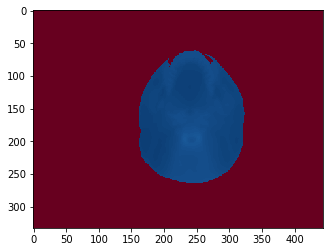

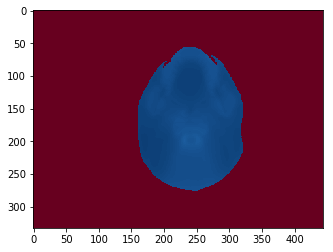

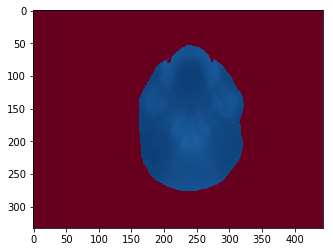

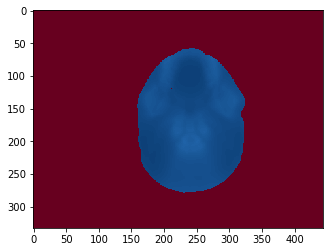

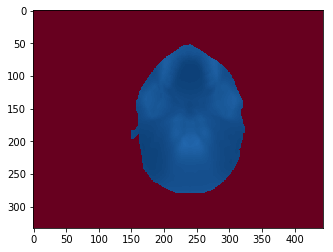

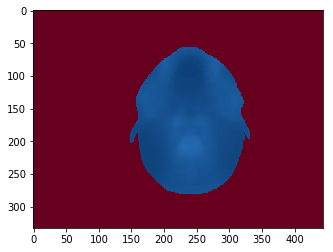

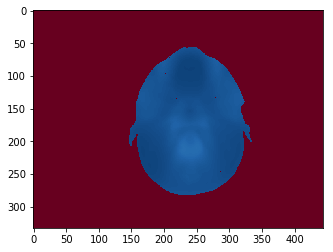

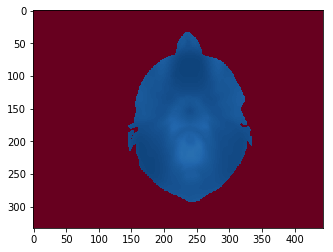

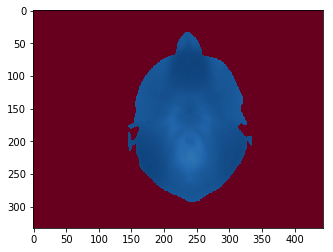

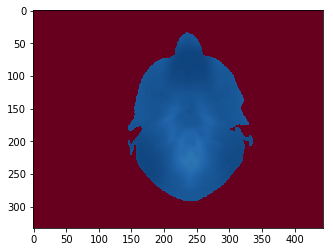

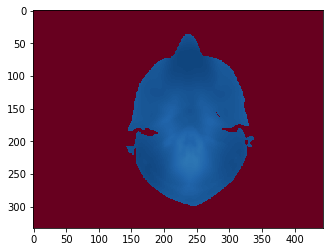

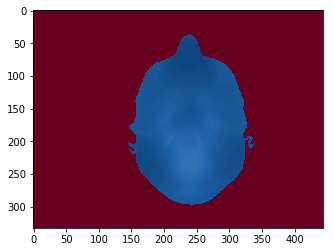

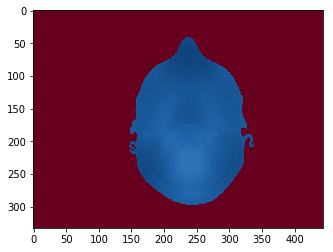

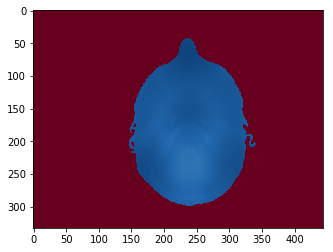

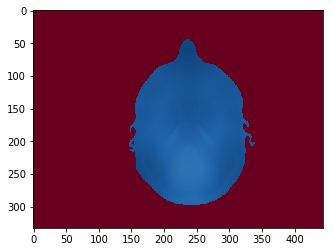

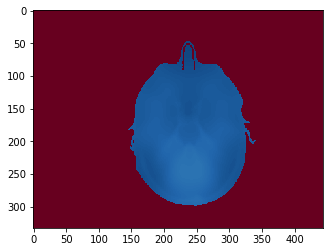

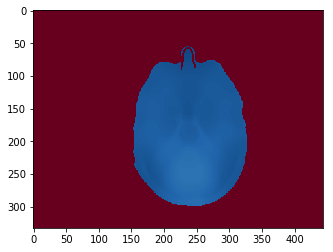

1250


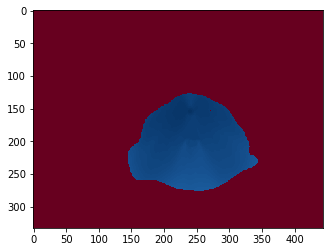

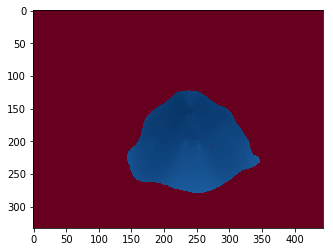

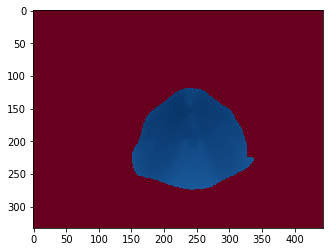

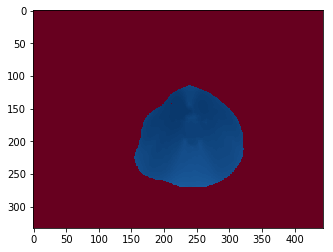

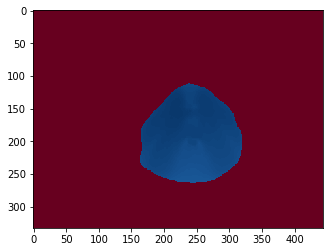

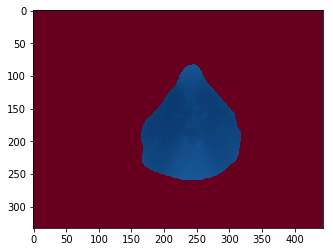

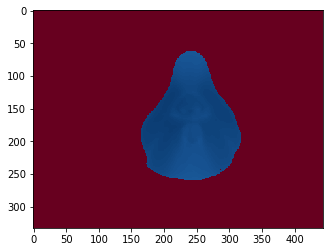

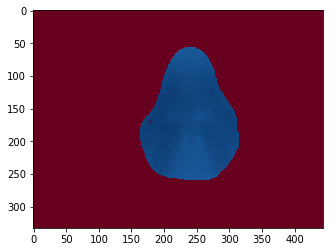

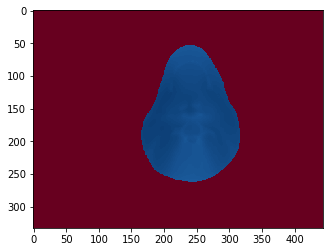

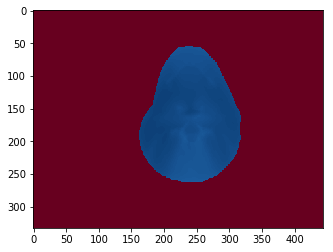

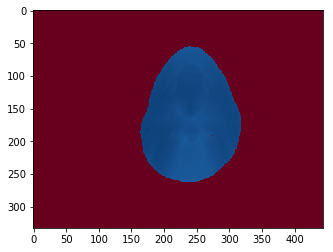

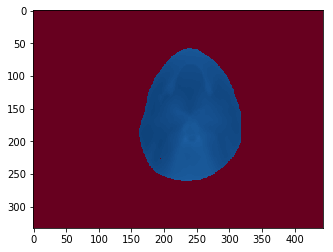

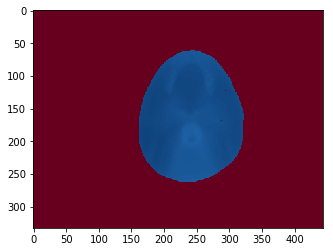

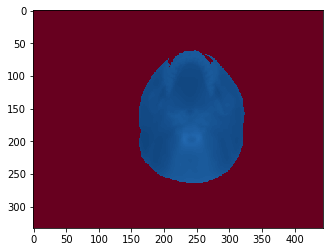

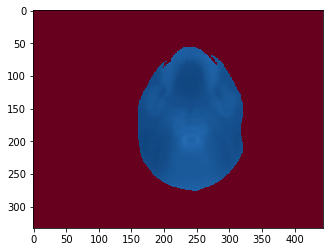

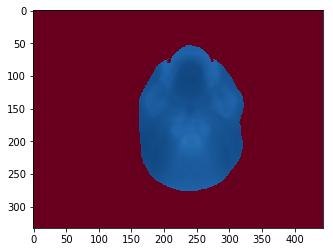

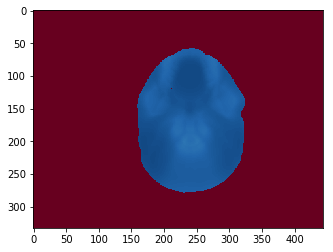

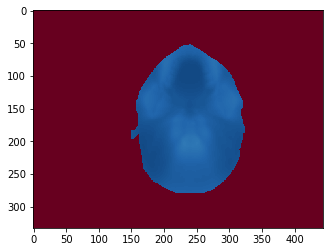

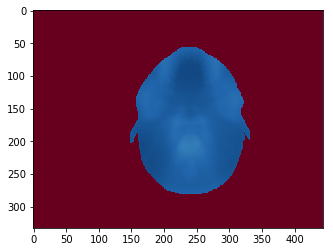

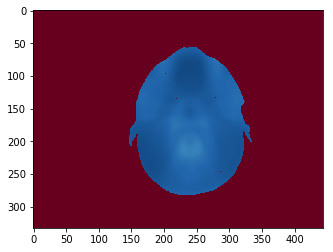

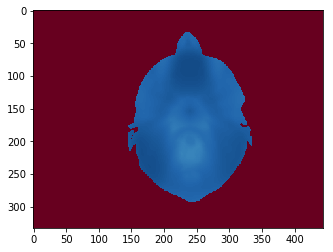

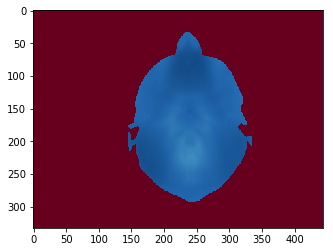

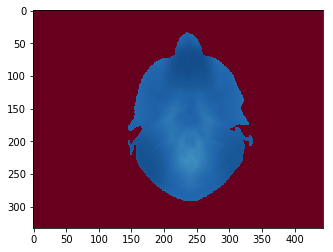

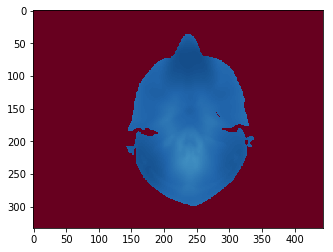

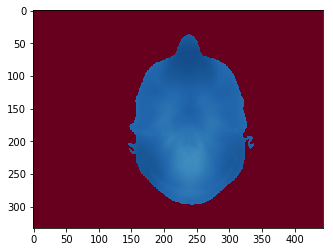

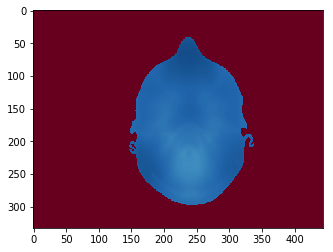

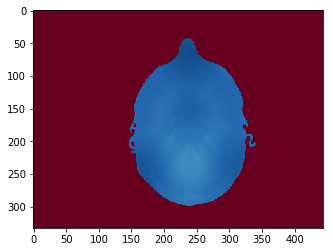

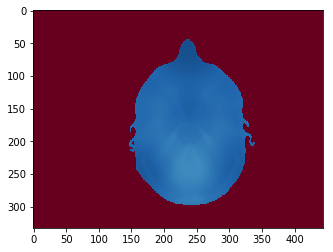

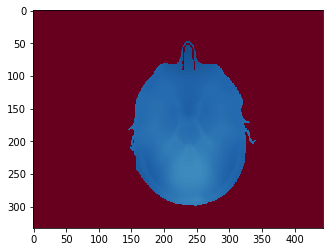

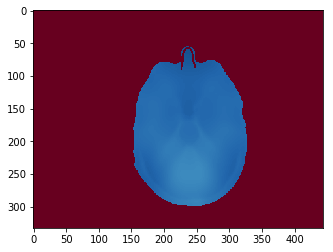

1760


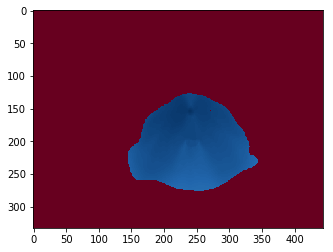

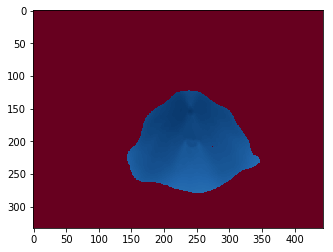

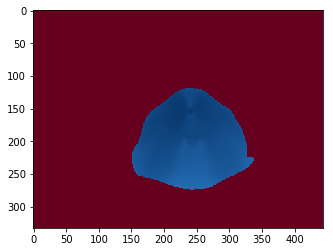

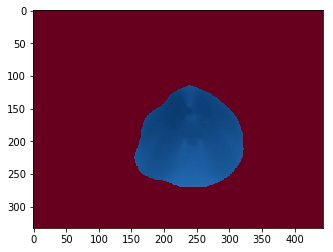

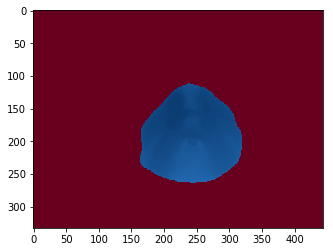

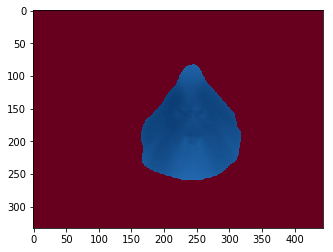

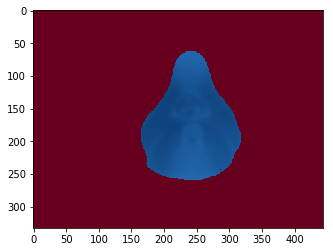

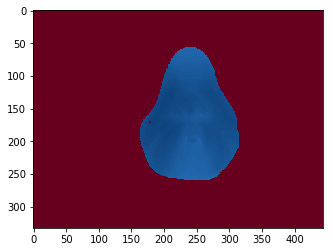

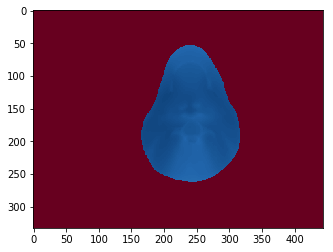

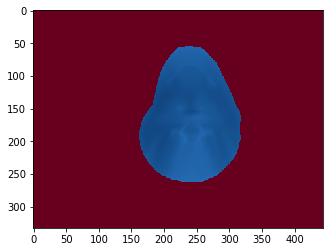

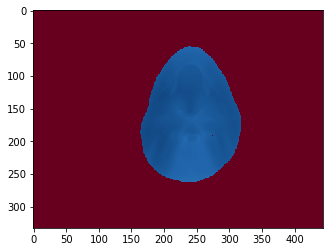

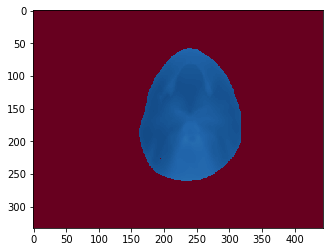

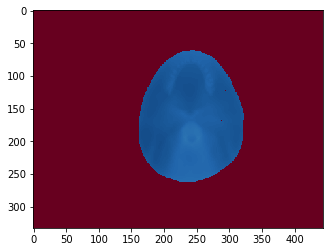

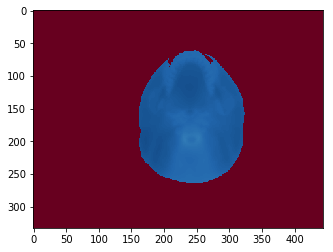

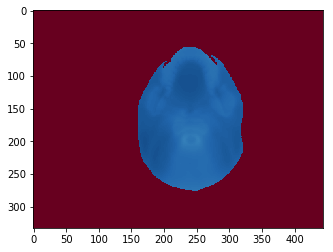

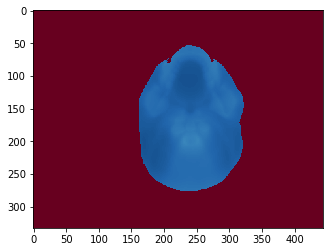

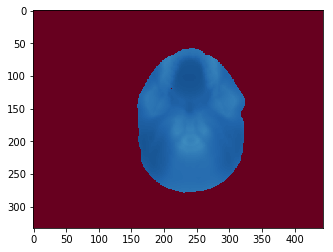

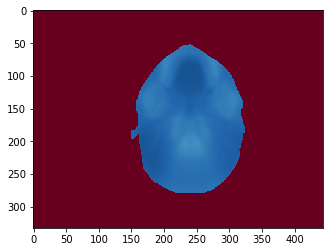

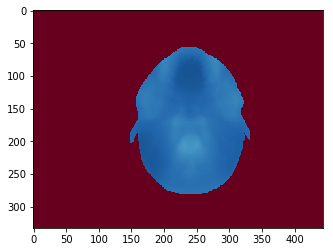

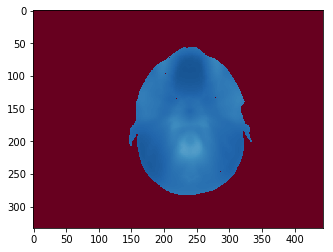

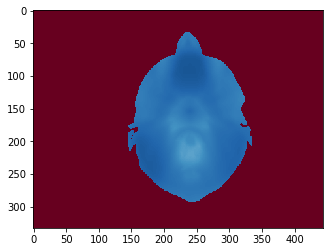

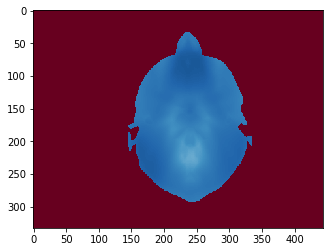

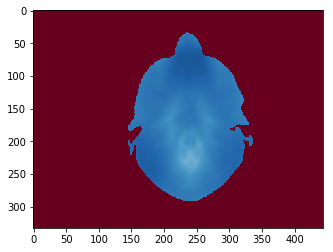

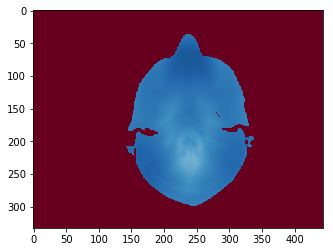

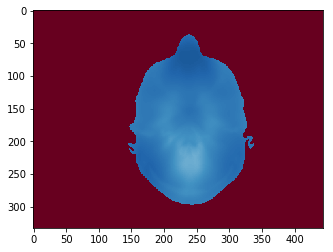

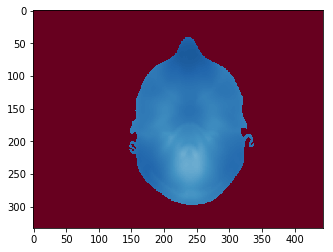

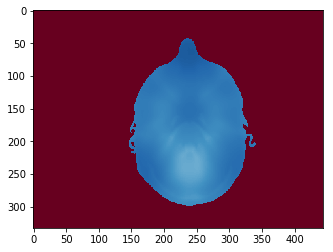

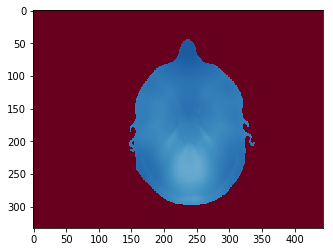

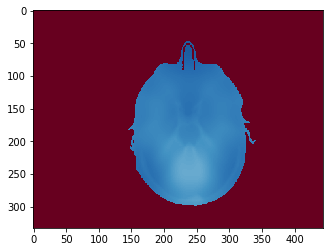

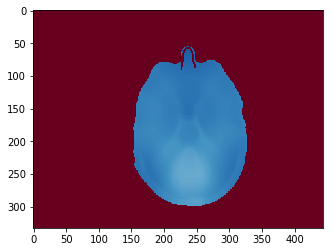

2500


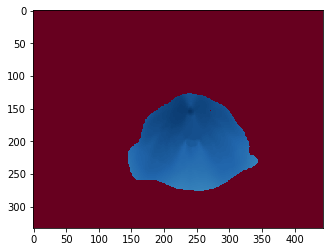

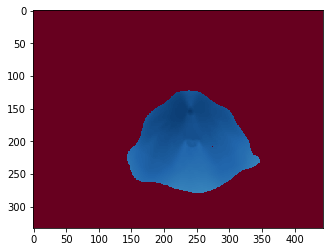

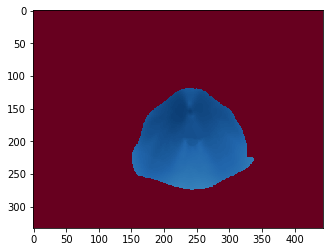

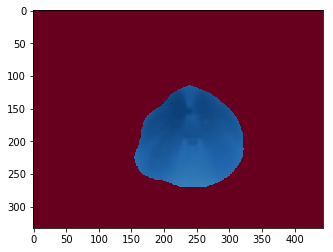

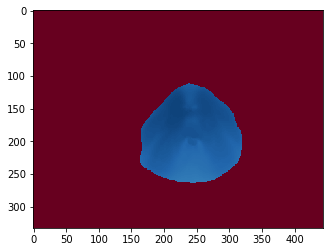

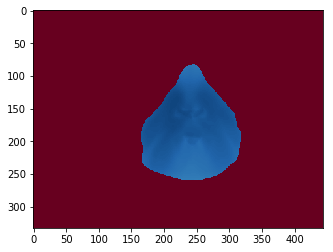

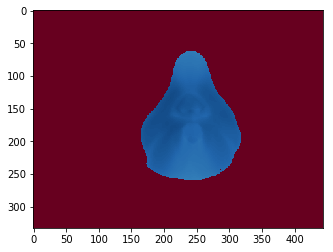

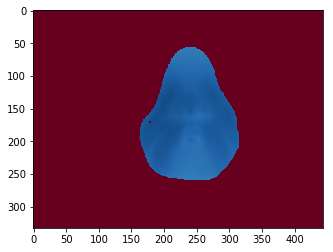

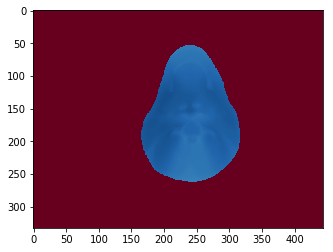

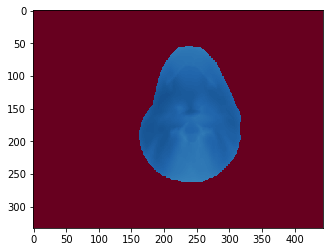

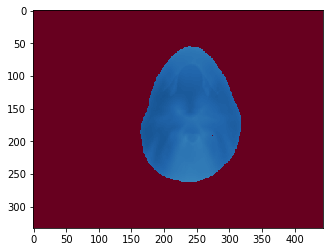

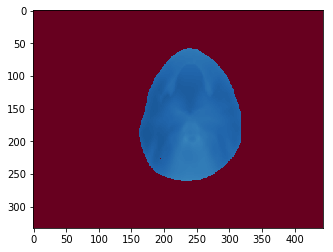

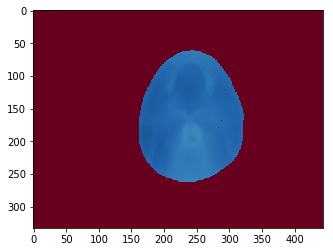

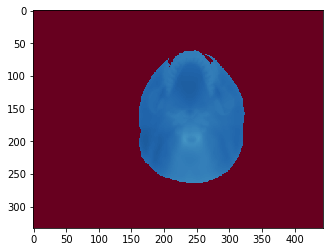

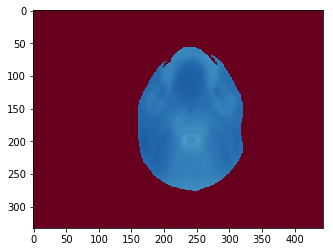

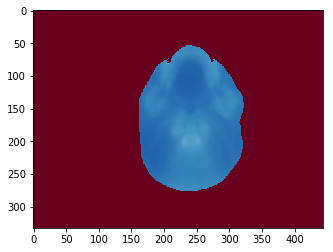

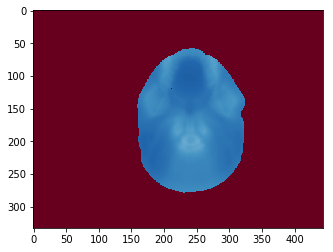

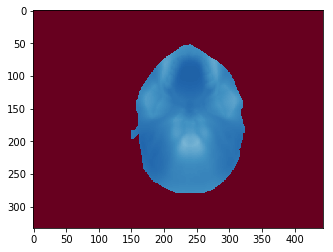

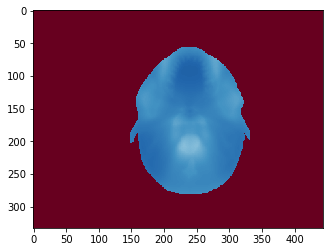

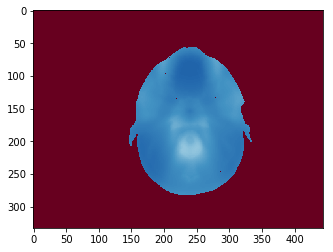

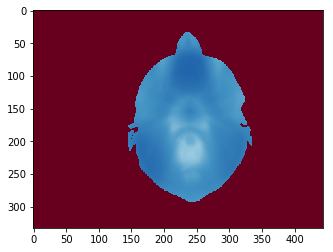

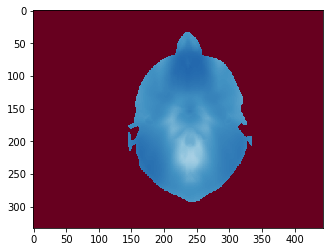

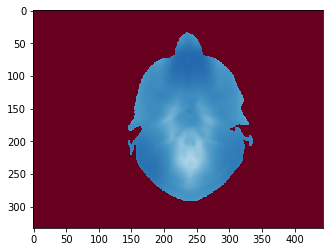

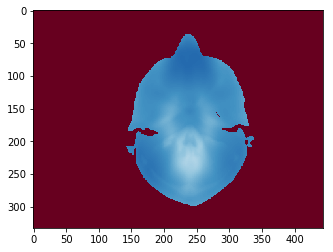

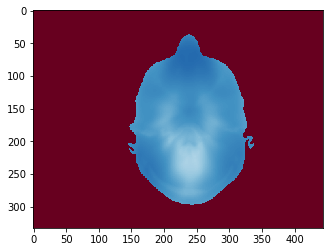

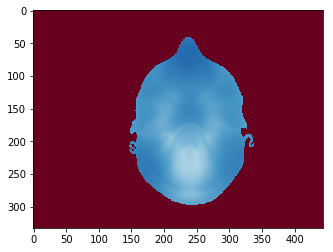

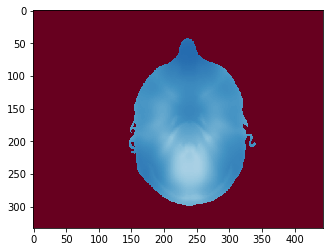

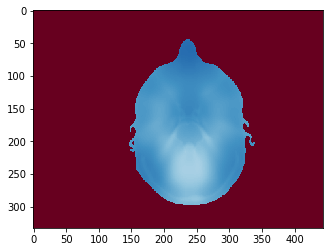

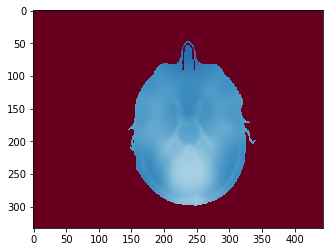

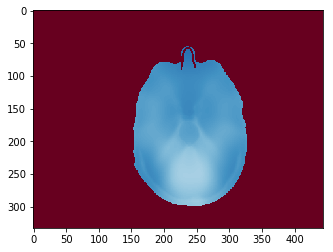

3520


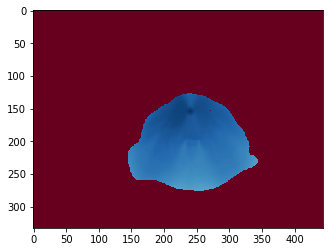

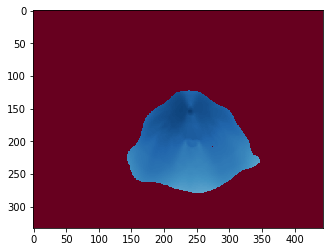

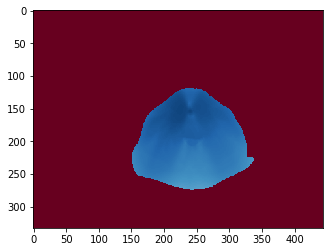

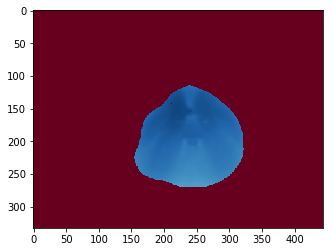

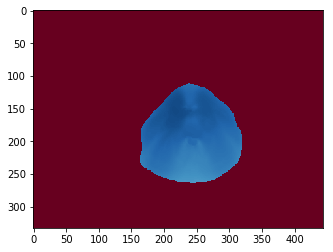

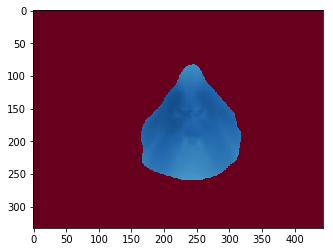

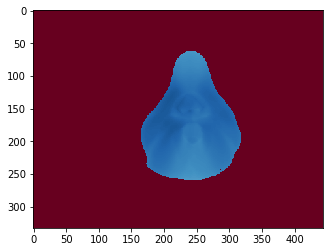

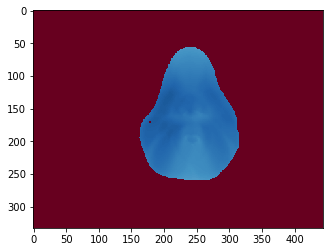

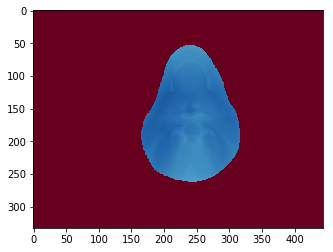

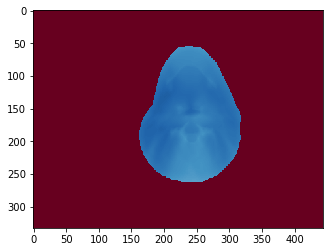

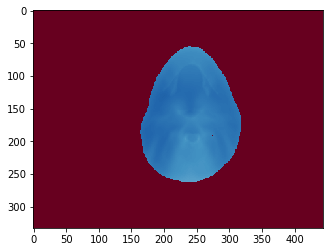

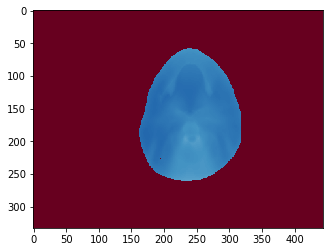

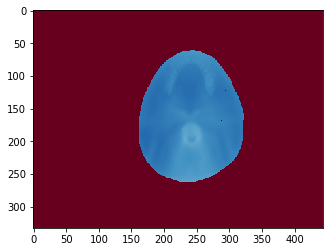

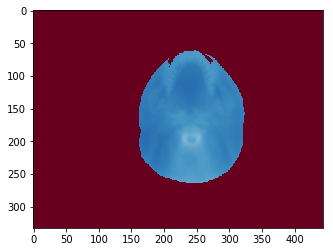

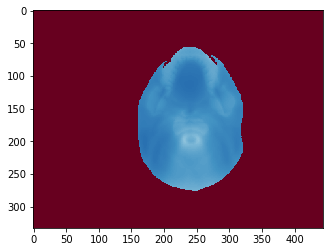

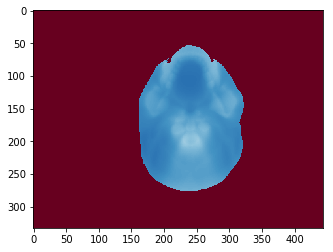

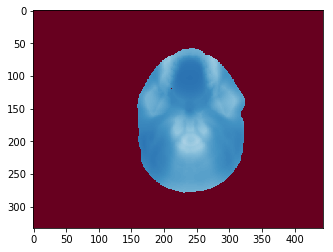

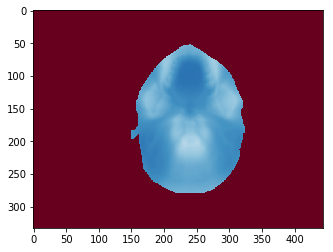

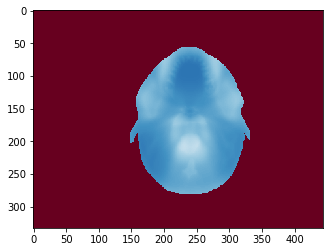

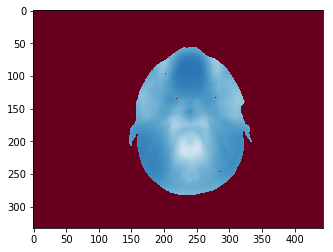

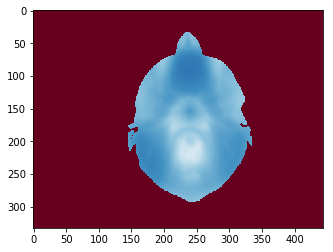

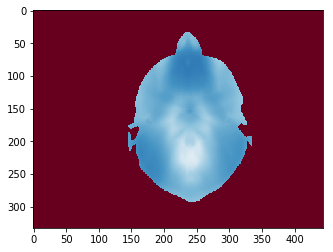

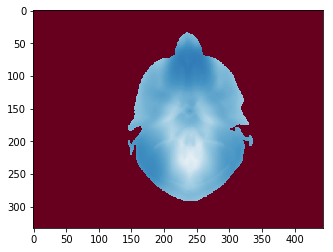

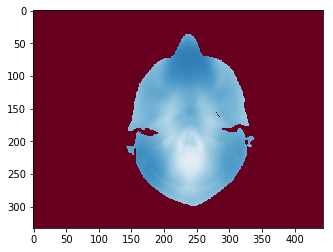

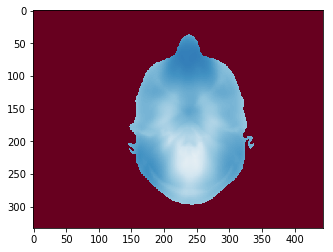

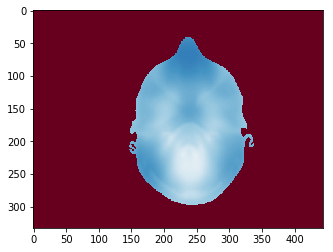

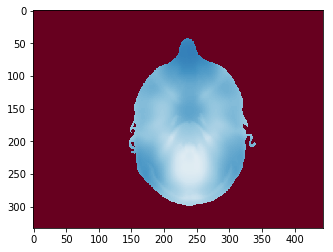

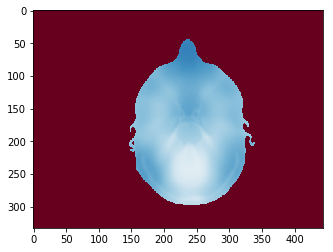

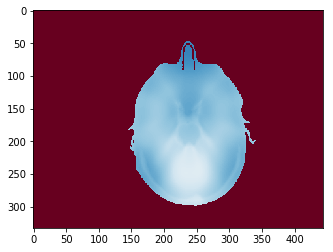

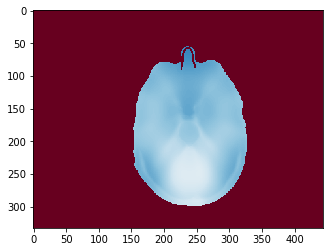

5000


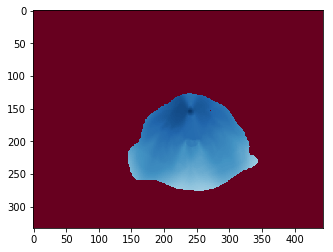

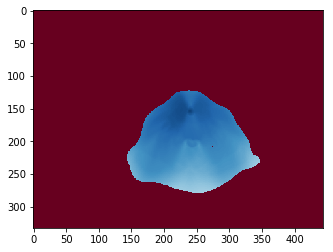

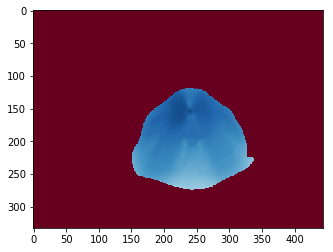

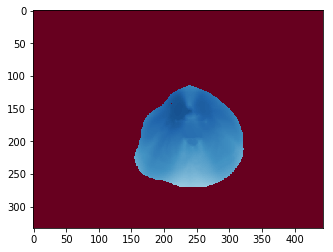

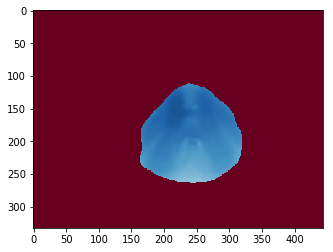

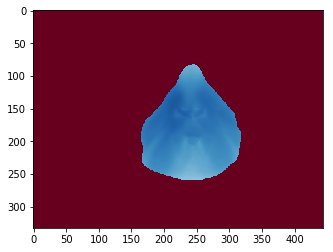

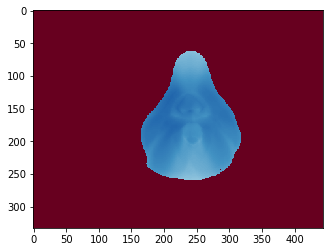

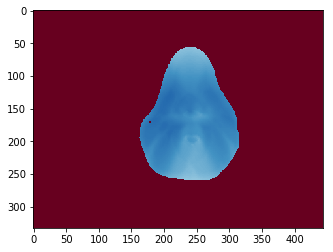

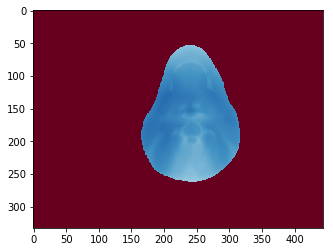

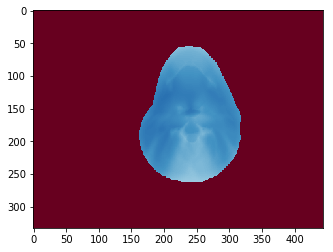

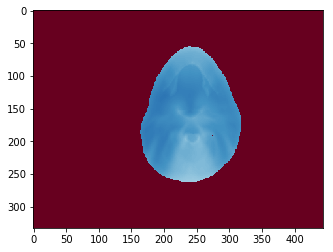

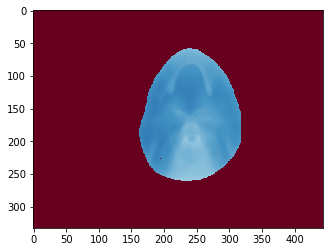

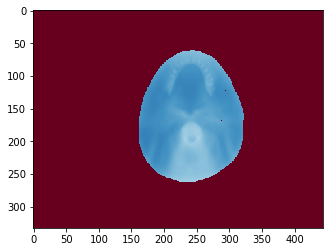

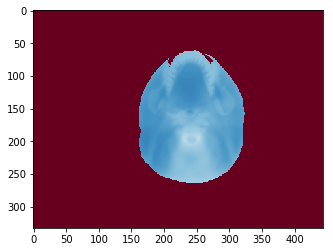

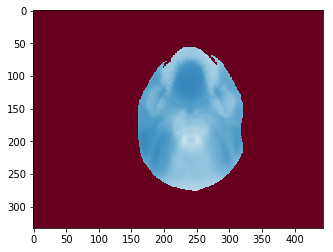

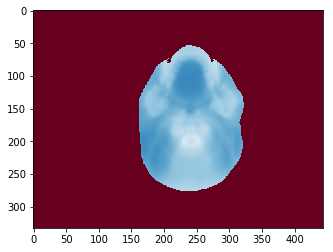

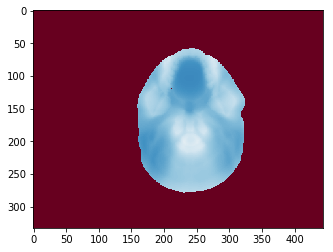

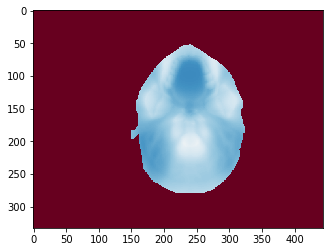

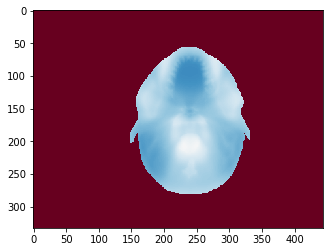

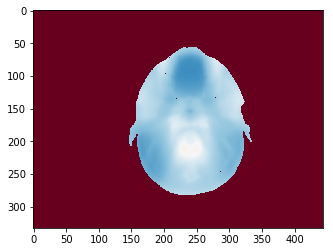

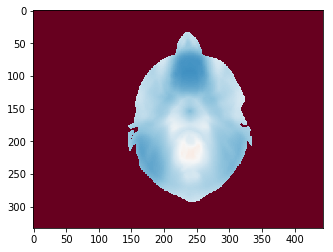

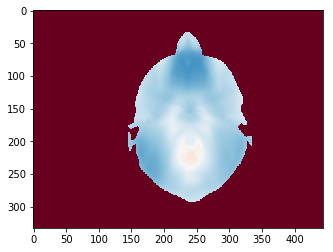

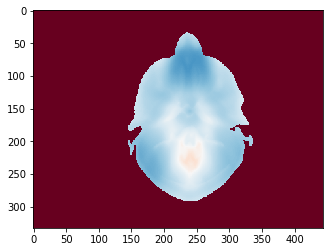

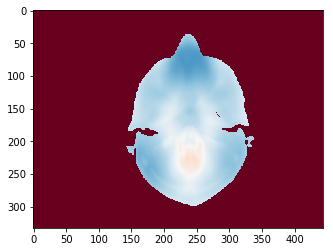

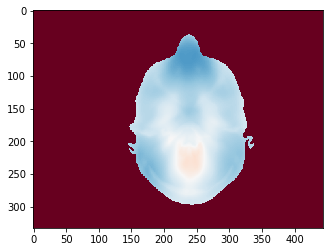

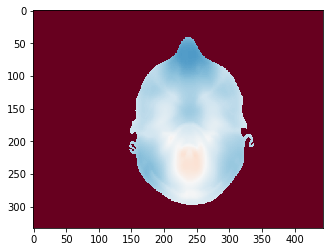

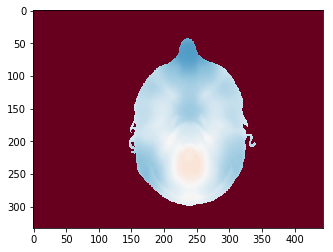

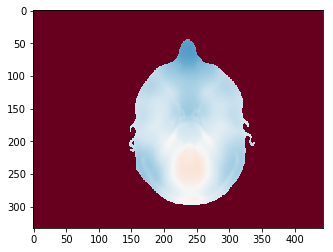

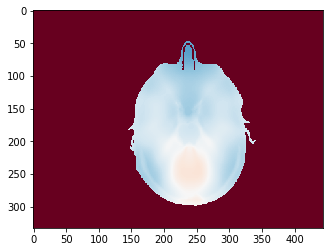

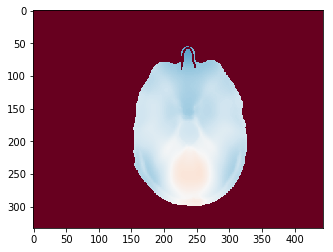

7040


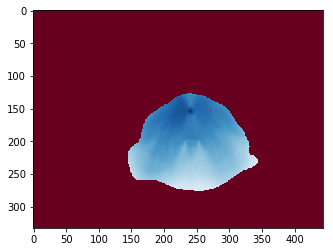

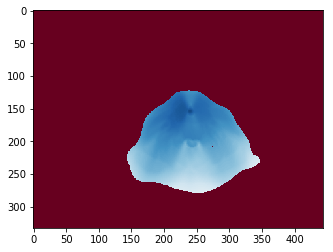

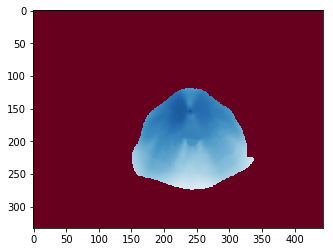

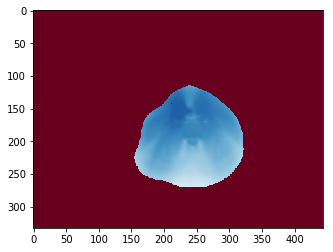

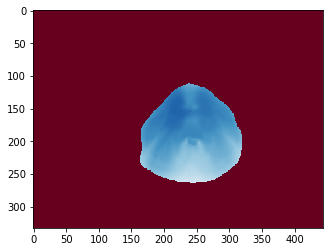

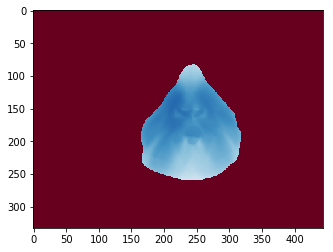

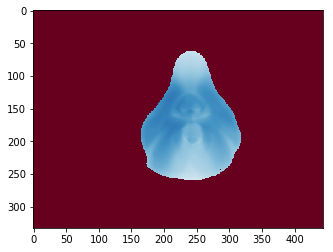

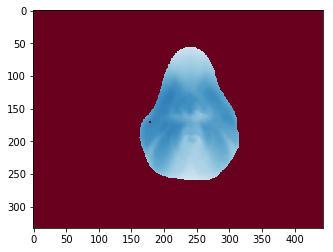

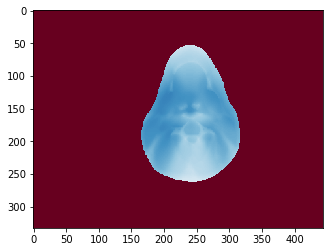

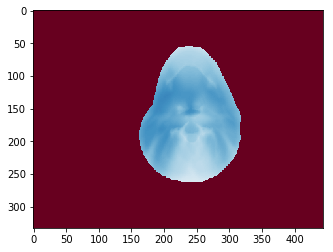

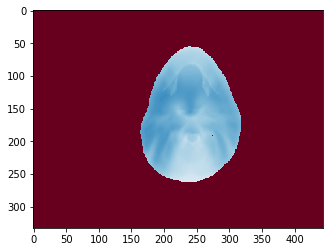

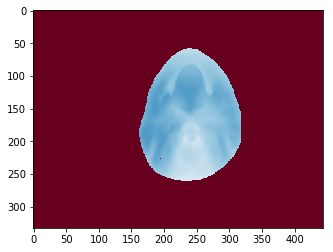

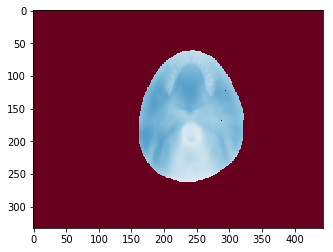

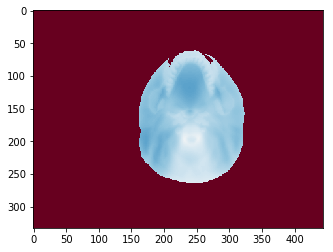

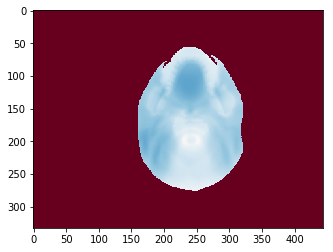

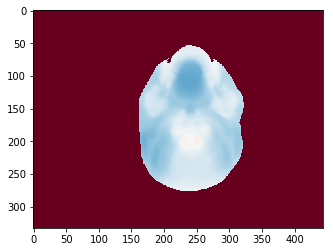

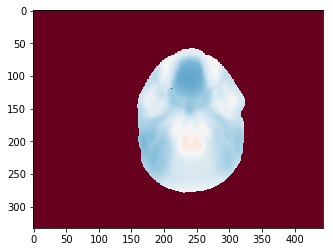

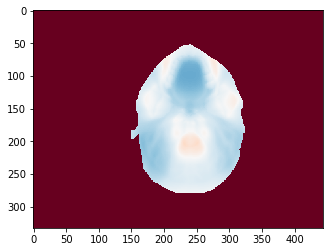

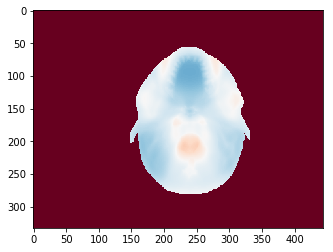

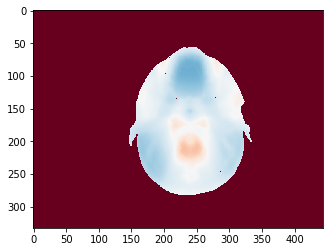

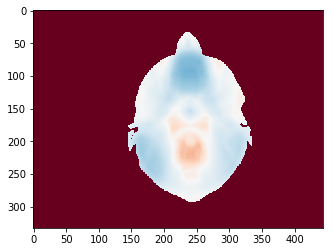

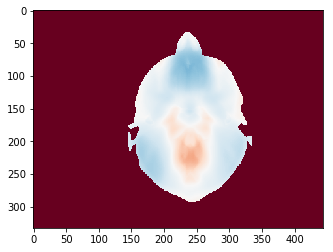

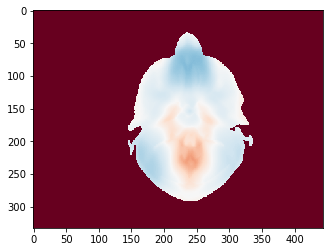

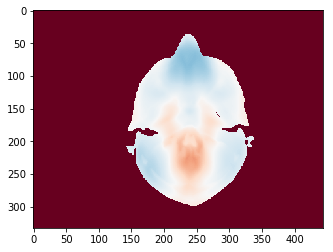

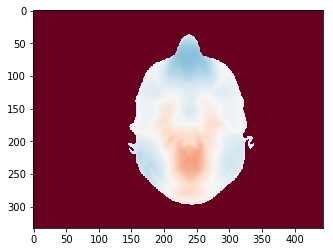

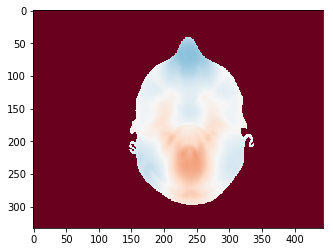

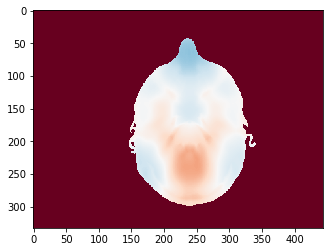

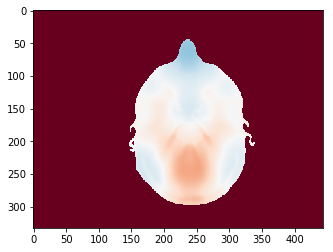

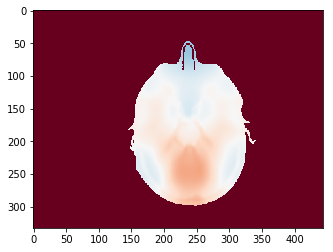

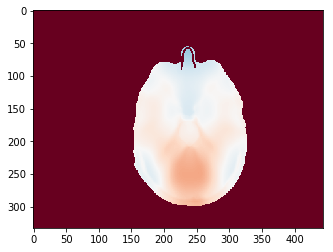

10000


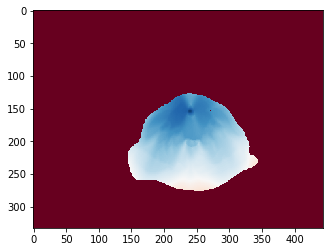

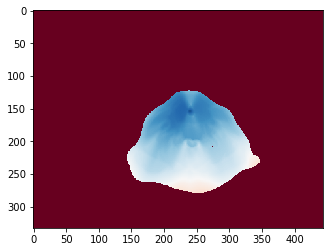

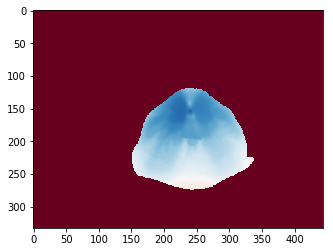

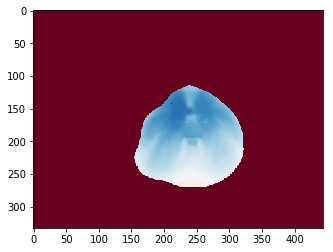

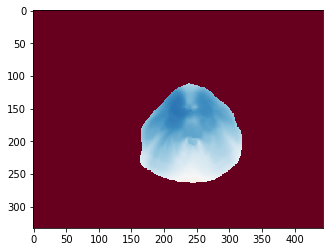

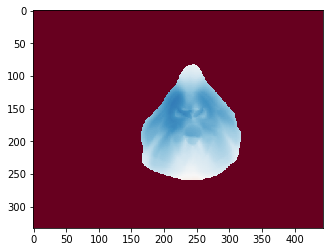

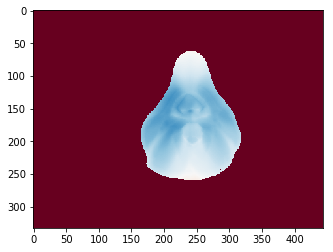

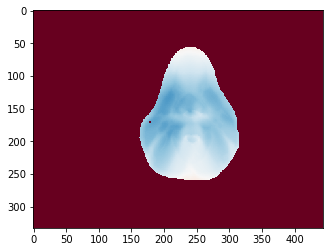

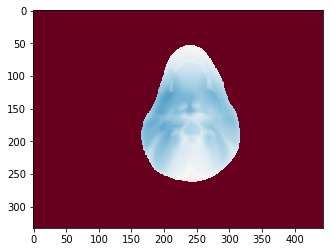

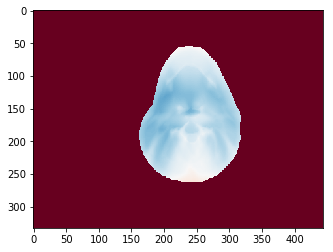

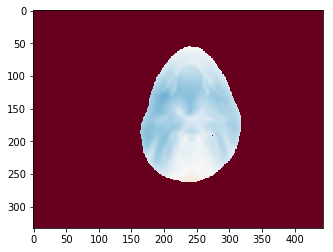

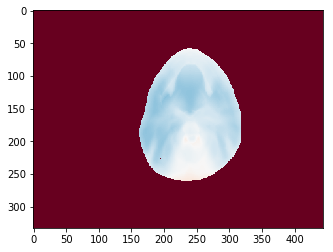

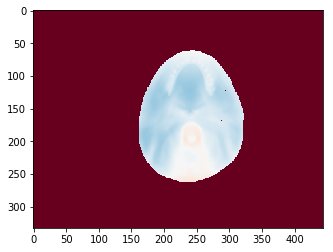

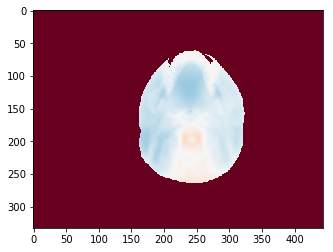

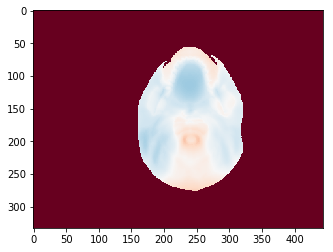

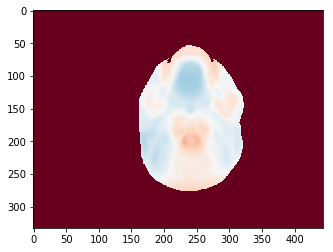

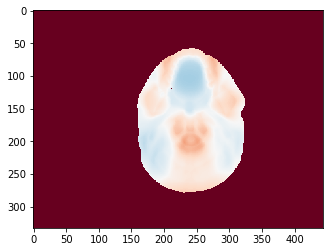

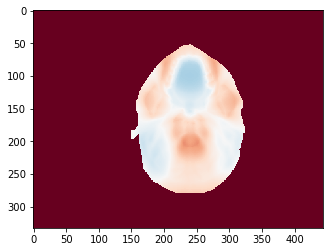

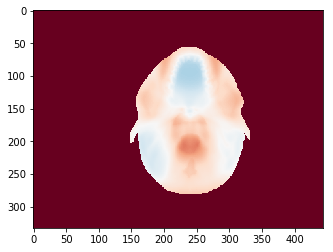

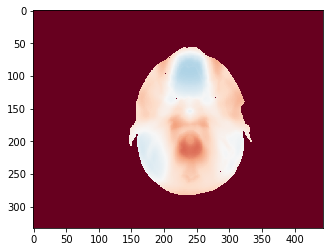

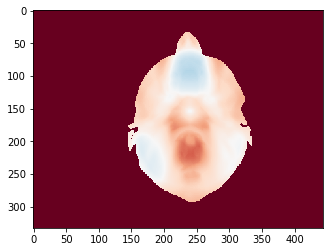

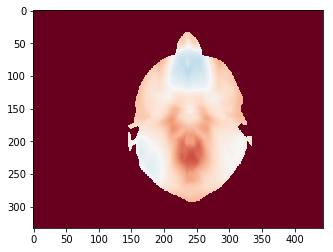

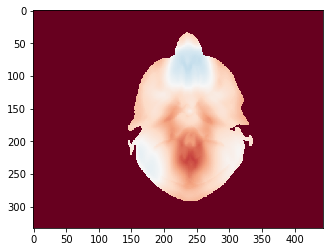

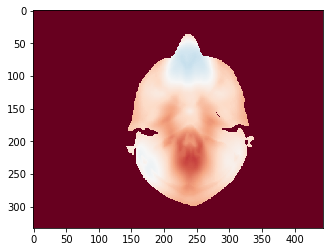

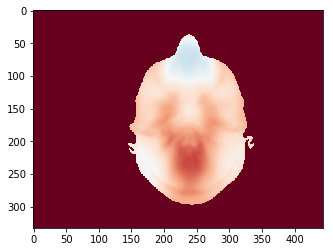

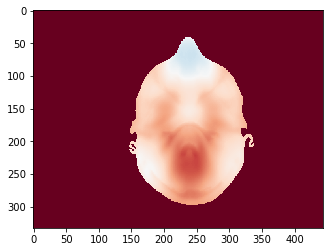

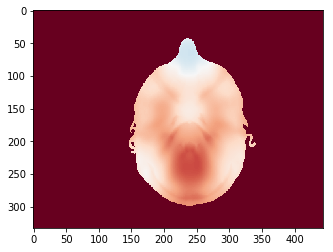

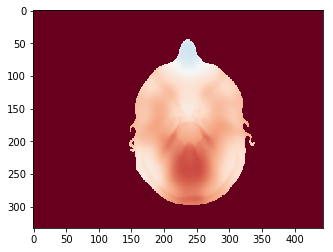

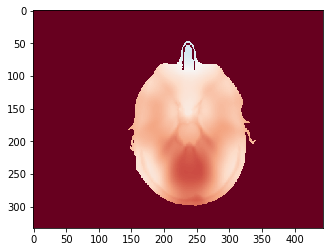

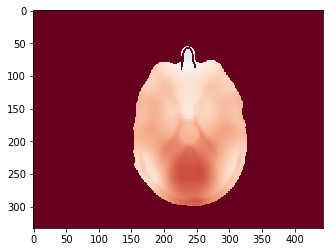

14080


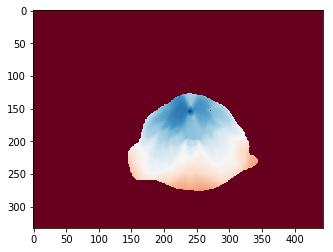

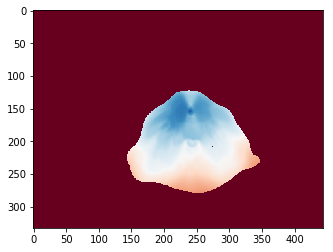

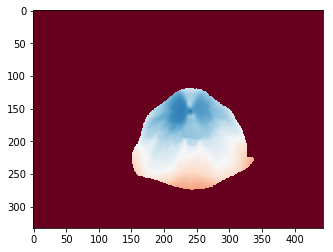

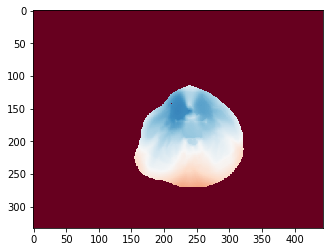

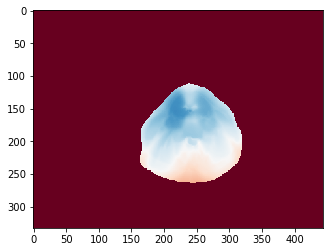

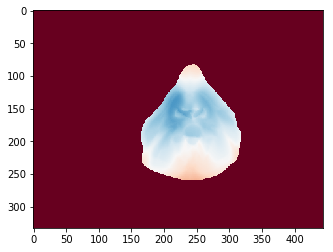

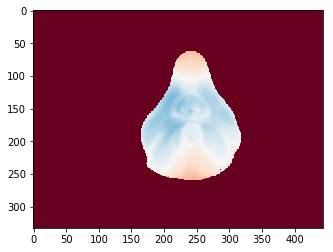

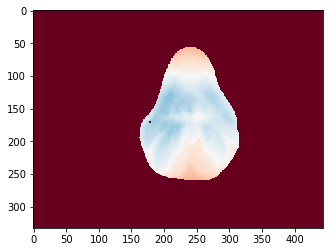

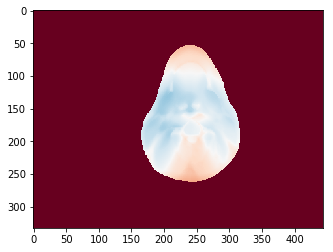

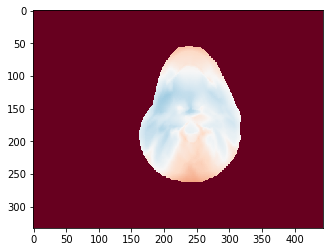

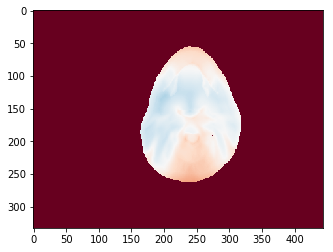

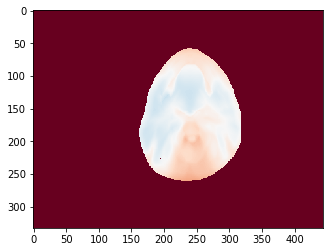

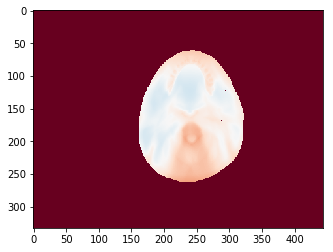

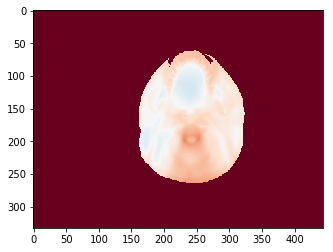

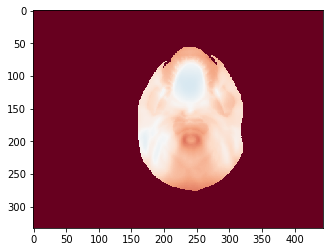

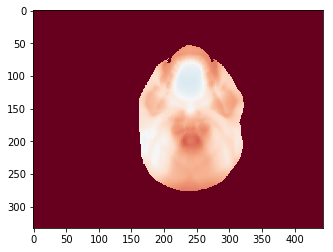

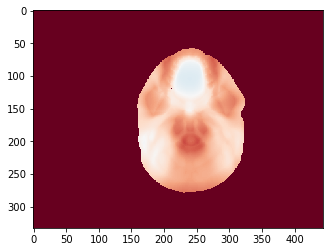

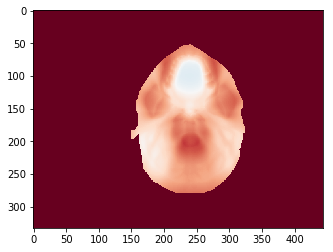

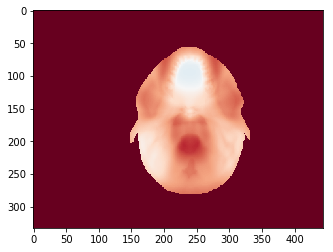

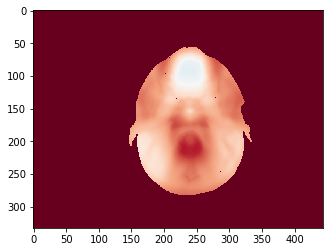

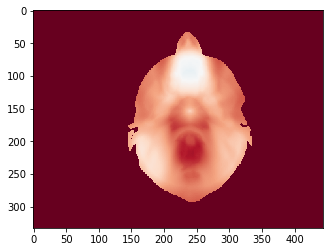

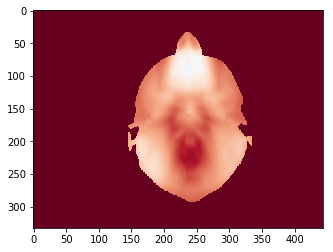

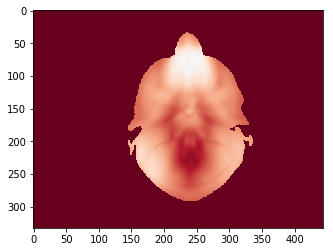

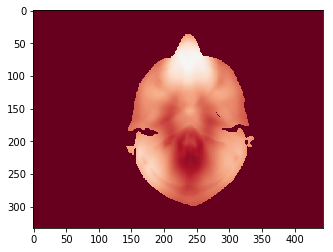

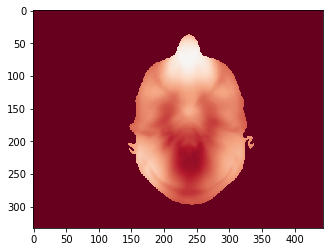

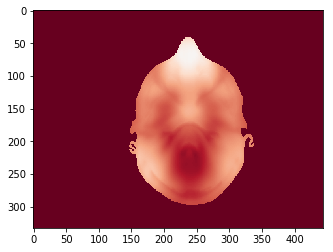

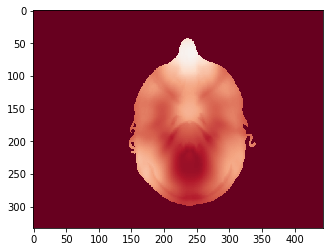

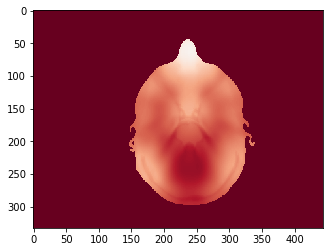

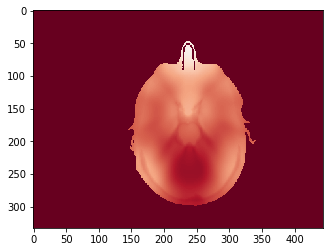

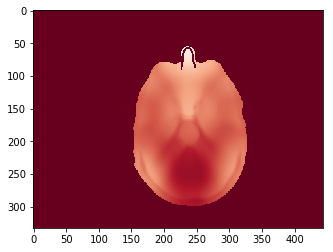

In [8]:
for tf in targetF:
    print(tf)
    Absobtion=Meterial_spectrum[tf]
    model = np.zeros(shape=(30//lz,1668//ly,2224//lx))
    model[sounddropz//lz,sounddropy//ly,sounddropx//lx]=1000000
    
    co1=lengthx
    co2=np.sqrt(2)*lengthx
    co1z=lengthz
    co2z=np.sqrt((lengthx**2)+(lengthz**2))
    co3z=np.sqrt((2*(lengthx**2))+(lengthz**2))
    allmultiple=co1*co2*co1z*co2z*co3z
    co1=allmultiple/co1
    co2=allmultiple/co2
    co1z=allmultiple/co1z
    co2z=allmultiple/co2z
    co3z=allmultiple/co3z

    evgle=((lengthx*lengthy*lengthz*6/math.pi)**(1/3))/100
    
    for i in tqdm(range(1,len(queue))):
        ix=int(queue.iloc[i].x)//lx
        iy=int(queue.iloc[i].y)//ly
        iz=int(queue.iloc[i].z)//lz
        imaterial=int(queue.iloc[i].material)
        if(imaterial>=0):
            
            Abs=Absobtion[imaterial]#abs per lengthx

            val=0
            piece=0

            if(ix-1>=0):
                if(model[iz][iy][ix-1]>0):
                    piece=piece+co1
                    val=val+((model[iz][iy][ix-1])*co1)

            if(ix+1<model.shape[2]):
                if(model[iz][iy][ix+1]>0):
                    piece=piece+co1
                    val=val+((model[iz][iy][ix+1])*co1)

            if(iy-1>=0):
                if(model[iz][iy-1][ix]>0):
                    piece=piece+co1
                    val=val+((model[iz][iy-1][ix])*co1)

            if(iy+1<model.shape[1]):
                if(model[iz][iy+1][ix]>0):
                    piece=piece+co1
                    val=val+((model[iz][iy+1][ix])*co1)

            if(iz-1>=0):
                if(model[iz-1][iy][ix]>0):
                    piece=piece+co1z
                    val=val+((model[iz-1][iy][ix])*co1z)

            if(iz+1<model.shape[0]):
                if(model[iz+1][iy][ix]>0):
                    piece=piece+co1z
                    val=val+((model[iz+1][iy][ix])*co1z)

            ####################################

            if(ix-1>=0 and iy-1>=0):
                if(model[iz][iy-1][ix-1]>0):
                    piece=piece+co2
                    val=val+((model[iz][iy-1][ix-1])*co2)

            if(ix+1<model.shape[2] and iy-1>=0):
                if (model[iz][iy-1][ix+1]>0):
                    piece=piece+co2
                    val=val+((model[iz][iy-1][ix+1])*co2)

            if(ix-1>=0 and iy+1<model.shape[1]):
                if(model[iz][iy+1][ix-1]>0):
                    piece=piece+co2
                    val=val+((model[iz][iy+1][ix-1])*co2)

            if(ix+1<model.shape[2] and iy+1<model.shape[1]):
                if(model[iz][iy+1][ix+1]>0):
                    piece=piece+co2
                    val=val+((model[iz][iy+1][ix+1])*co2)

            ####

            if(ix-1>=0 and iz-1>=0):
                if(model[iz-1][iy][ix-1]>0):
                    piece=piece+co2z
                    val=val+((model[iz-1][iy][ix-1])*co2z)

            if(ix-1>=0 and iz+1<model.shape[0]):
                if(model[iz+1][iy][ix-1]>0):
                    piece=piece+co2z
                    val=val+((model[iz+1][iy][ix-1])*co2z)

            if(ix+1<model.shape[2] and iz-1>=0):
                if(model[iz-1][iy][ix+1]>0):
                    piece=piece+co2z
                    val=val+((model[iz-1][iy][ix+1])*co2z)

            if(ix+1<model.shape[2] and iz+1<model.shape[0]):
                if(model[iz+1][iy][ix+1]>0):
                    piece=piece+co2z
                    val=val+((model[iz+1][iy][ix+1])*co2z)

            ####

            if(iy-1>=0 and iz-1>=0):
                if(model[iz-1][iy-1][ix]>0):
                    piece=piece+co2z
                    val=val+((model[iz-1][iy-1][ix])*co2z)

            if(iy-1>=0 and iz+1<model.shape[0]):
                if(model[iz+1][iy-1][ix]>0):
                    piece=piece+co2z
                    val=val+((model[iz+1][iy-1][ix])*co2z)

            if(iy+1<model.shape[1] and iz-1>=0):
                if(model[iz-1][iy+1][ix]>0):
                    piece=piece+co2z
                    val=val+((model[iz-1][iy+1][ix])*co2z)

            if(iy+1<model.shape[1] and iz+1<model.shape[0]):
                if(model[iz+1][iy+1][ix]>0):
                    piece=piece+co2z
                    val=val+((model[iz+1][iy+1][ix])*co2z)

            ####################################

            if(ix-1>=0 and iy-1>=0 and iz-1>=0):
                if(model[iz-1][iy-1][ix-1]>0):
                    piece=piece+co3z
                    val=val+((model[iz-1][iy-1][ix-1])*co3z)

            if(ix+1<model.shape[2] and iy+1<model.shape[1] and iz+1<model.shape[0]):
                if(model[iz+1][iy+1][ix+1]>0):
                    piece=piece+co3z
                    val=val+((model[iz+1][iy+1][ix+1])*co3z)

            if(ix-1>=0 and iy-1>=0 and iz+1<model.shape[0]):
                if(model[iz+1][iy-1][ix-1]>0):
                    piece=piece+co3z
                    val=val+((model[iz+1][iy-1][ix-1])*co3z)

            if(ix-1>=0 and iy+1<model.shape[1] and iz-1>=0):
                if(model[iz-1][iy+1][ix-1]>0):
                    piece=piece+co3z
                    val=val+((model[iz-1][iy+1][ix-1])*co3z)

            if(ix-1>=0 and iy+1<model.shape[1] and iz+1<model.shape[0]):
                if(model[iz+1][iy+1][ix-1]>0):
                    piece=piece+co3z
                    val=val+((model[iz+1][iy+1][ix-1])*co3z)

            ## 

            if(ix+1<model.shape[2] and iy-1>=0 and iz-1>=0):
                if(model[iz-1][iy-1][ix+1]>0):
                    piece=piece+co3z
                    val=val+((model[iz-1][iy-1][ix+1])*co3z)

            if(ix+1<model.shape[2] and iy-1>=0 and iz+1<model.shape[0]):
                if(model[iz+1][iy-1][ix+1]>0):
                    piece=piece+co3z
                    val=val+((model[iz+1][iy-1][ix+1])*co3z)

            if(ix+1<model.shape[2] and iy+1<model.shape[1] and iz-1>=0):
                if(model[iz-1][iy+1][ix+1]>0):
                    piece=piece+co3z
                    val=val+((model[iz-1][iy+1][ix+1])*co3z)
            #print('piece:',piece)
            if piece>0:
                model[iz,iy,ix]=(val/piece)/(10**(Abs*8.69*evgle))
                #print(model[iz,iy,ix])
            
    if(tf=='27.5'):
        save('27hz.npy', model)
    else:
        save(tf+'hz.npy', model)
        
    for i in range(len(model)):
        
        plt.imshow(model[i], cmap="RdBu",interpolation='nearest',
               vmin=53429, vmax=1000000)
        #plt.savefig("14080hz_"+str(i)+'.png')
        plt.show()

In [9]:
from numpy import load
model=load('14080hz.npy')
model[model!=0].min()

104012.87273249064

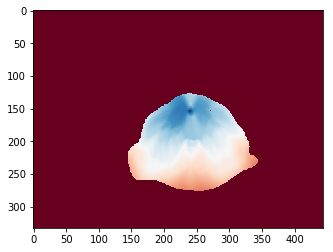

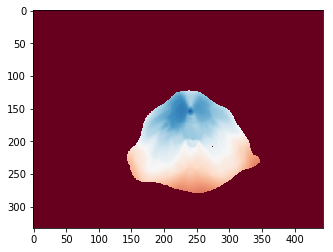

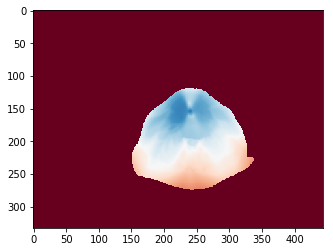

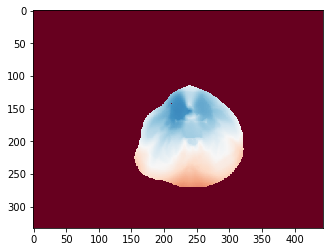

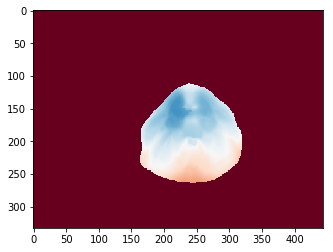

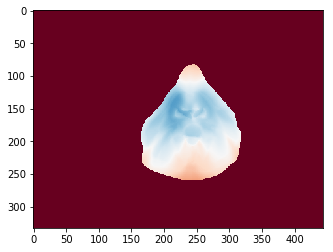

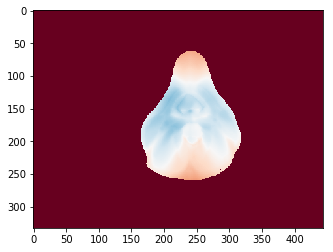

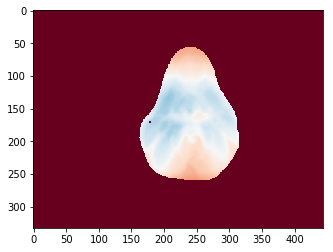

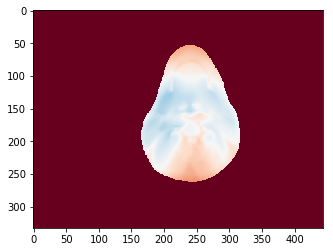

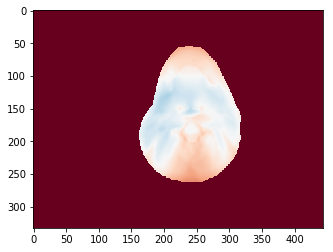

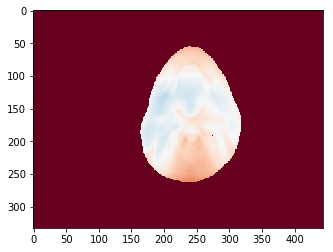

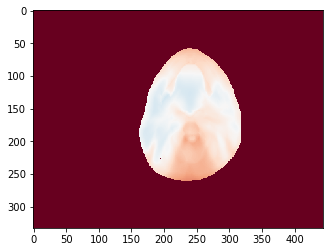

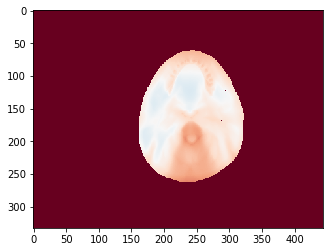

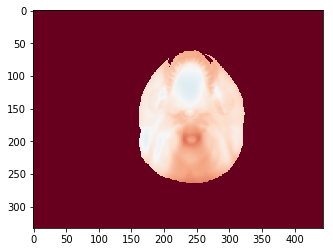

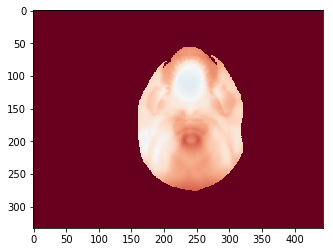

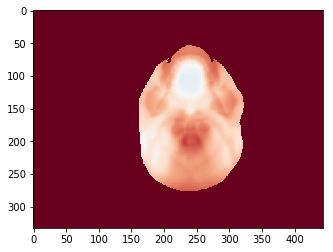

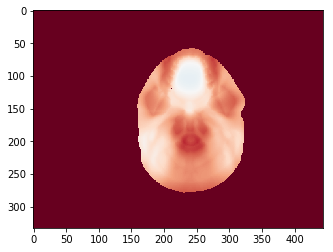

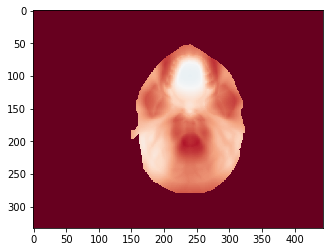

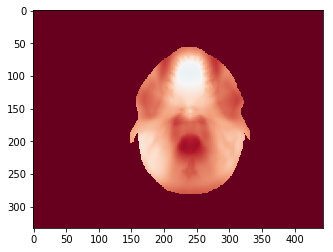

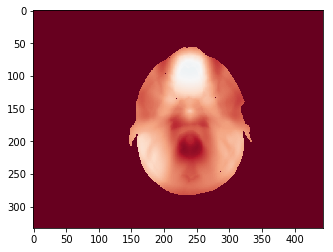

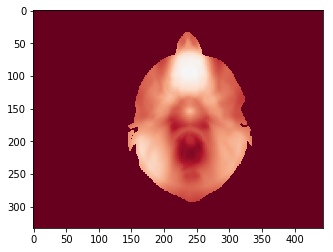

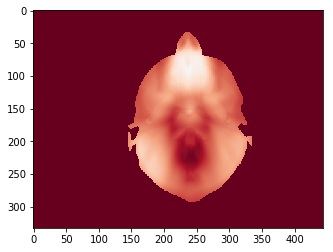

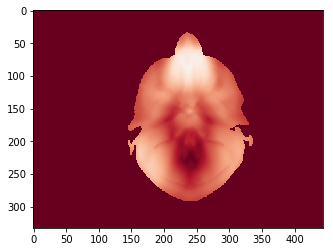

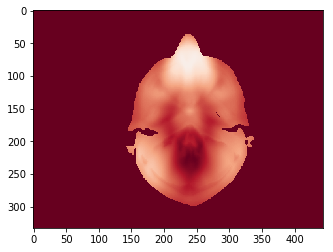

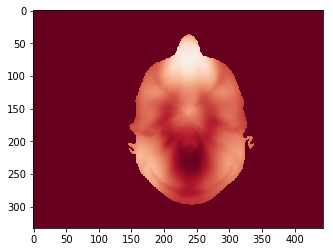

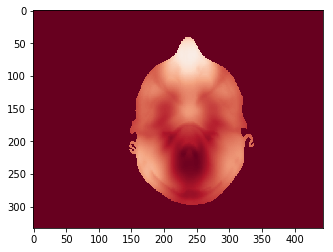

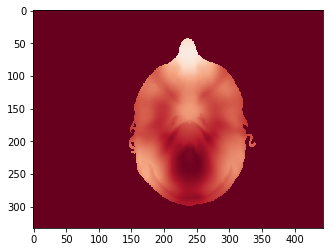

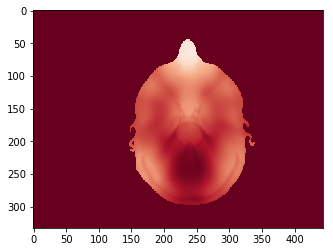

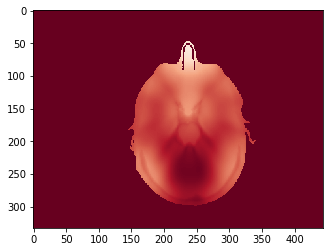

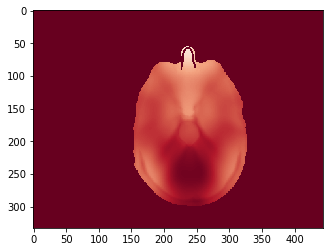

In [10]:
for i in range(len(model)):
        
    plt.imshow(model[i], cmap="RdBu",interpolation='nearest',
               vmin=model[model!=0].min(), vmax=1000000)
        #plt.savefig("14080hz_"+str(i)+'.png')
    plt.show()